In [1]:
# Analysis libraries
import numpy as np
import pandas as pd
from scipy.stats import entropy, norm, gamma, linregress, pearsonr
from scipy.optimize import curve_fit
from scipy.special import gamma, hyp2f1
from scipy.stats import ks_2samp, kstest

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.ticker as tck
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import shapely 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LogNorm, SymLogNorm

# Other libraries
import os
import sys
import re
import itertools
from tqdm import tqdm
import pickle

import pareto as pt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
from utils import *

In [2]:
def plot_SAD(data, nbins):
    if len(data) < nbins:
        return None
    else:
        bins, counts, prob, pdf = pt.log_hist(data, nbins)
        x = np.sqrt(bins[1:] * bins[:-1])
        y = pdf
        x = x[y > 0]
        y = y[y > 0]
        return x, y

In [3]:
sns.set(font='Avenir', font_scale=1., style='ticks')
fig_formats = ['.pdf', '.png', '.svg']
fig_dir = '../fig/'
supfig_dir = fig_dir+'supfig/'
os.makedirs(fig_dir, exist_ok=True)
os.makedirs(supfig_dir, exist_ok=True)
figsize_geo = (10,7.5)

colorSRF = '#7BC8F6'
colorDCM = '#000033'

palettename = 'coolwarm'
palette = sns.color_palette(palettename, 32)

golden = (1 + 5 ** 0.5) / 2
cms = 0.393701
figsize = (golden*8*cms,8*cms)

sns.set(rc={'figure.figsize':(3.5,3.5), 'figure.dpi':200, 'savefig.dpi':400})
sns.set_theme(font="Avenir", font_scale=1., style="ticks")

## Metadata

In [4]:
# topID metaB key
filename = '../data/topID_metaB_key.csv'
topID_metaB_key = pd.read_csv(filename, index_col=0)
topID_metaB_key

,taxon,level
md5sum,,
00b5bb3b1cae64e4d2761e16fc91b2cb,Proboscia,genus
039a44f7c456a8d518a656d4bddb3594,Odontella sinensis,species
044e857fc8eb5fd22318010046f420af,Chaetoceros,genus
0dee4375a6cbe9d2a091e451b1a96370,Guinardia flaccida,species
14b113961e0805fb5e1bb3b40d828f52,Corethron inerme,species
14d6921f8bc3cf5beeb7e09e97590b44,Mediophyceae,class
1a3552c223231f0691e3309b22560e91,Thalassiosira,genus
1dd232dc11ab0be77562507e2cd0e920,NaN,NaN
1e603b319d769d234717b272f9ec8975,Bacillariophyceae,class


In [5]:
# import metadata

filename_meta = '../data/woa_pisces_tarassd.tsv'
df = pd.read_csv(filename_meta, sep ='\t')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="ESRI:54030")
# rename SUR to SRF in depth_category column
gdf['depth_category'] = gdf['depth_category'].replace('SUR', 'SRF')

# station 50 is missing!
# station 19 will be further removed because of bad data
gdf.tail()

,station,latitude,longitude,depth_category,depth_nominal,month,SSD,temp_woa,sal_woa,no3_woa,po4_woa,sioh4_woa,dco,dcu,dfe,dzn,geometry
129,205,72.4693,-71.8920,SRF,5,10,584.5,-0.89261,31.219290,1.793274,0.440587,3.355274,107.994,0.848,1.990,1.035,POINT (-71.892 72.469)
130,206,70.9618,-53.6030,SRF,5,10,564.5,2.43763,32.896900,1.785118,0.084252,2.914919,-999.000,-999.000,-999.000,-999.000,POINT (-53.603 70.962)
131,208,69.1136,-51.5086,SRF,5,10,508.0,2.93860,33.131413,1.630793,0.000000,3.127574,-999.000,-999.000,-999.000,-999.000,POINT (-51.509 69.114)
132,209,64.7127,-53.0106,SRF,5,10,531.5,2.51751,32.442013,3.216127,0.491307,0.668157,90.334,0.996,2.416,1.333,POINT (-53.011 64.713)
133,210,61.5442,-55.9865,SRF,5,10,535.0,5.20301,33.989799,3.419286,0.553510,2.276372,61.584,1.006,0.427,1.519,POINT (-55.986 61.544)


## Abundance data

In [6]:
# import abundances

filename_abund = '../data/Abundance.csv'
Abundances = pd.read_csv(filename_abund, index_col=0, header=0)
# since the column 019_SRF has a total abundance of 3, we remove it both from Abundances and gdf
Abundances = Abundances.drop(columns=['019_SRF'])
gdf = gdf.loc[~gdf['station'].isin([19])]
Normalized_Abundances = Abundances/Abundances.sum(axis=0)

Depths = {d: [c for c in Abundances.columns if c[-3:]==d] for d in ['SRF','DCM']}
Stations = np.unique([int(c.split('_')[0]) for c in Abundances[Abundances.sum(axis=1)>0].columns])
print (' Number of stations: {} \n Number of different OTUs: {}'.format(len(Stations), len(Abundances)))
print ('\n Number of stations SRF: {} \n Number of stations DCM: {}'.format(len(Depths['SRF']),len(Depths['DCM'])))

 Number of stations: 124 
 Number of different OTUs: 5830

 Number of stations SRF: 124 
 Number of stations DCM: 58


In [7]:
Abundances.head()

,158_SRF,188_SRF,194_SRF,194_DCM,168_DCM,206_SRF,191_SRF,180_DCM,196_SRF,173_SRF,...,150_DCM,150_SRF,151_DCM,151_SRF,152_SRF,047_DCM,047_SRF,049_SRF,078_SRF,078_DCM
0007584343baed6a66bc624ab07afa51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000d7f48a59463756281b4ea64af743f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001dedda63f65dd120ccef5ed9eff10a,0,0,2,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002590d1d8d94af8dfcf5980c719d116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00374edaf2b110b52ffe3daea3626d01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
number_of_bloomers = 20
abundance_thsh = 1
xmin = abundance_thsh

biomass_bloom = {}
biomass_bulk = {}
richness_bloom = {}
richness_bulk = {}
rho_bulk = {}
pvalue_bulk = {}
rho_linear_fit = {}

for column in Abundances.columns:
    station = int(column.split('_')[0])
    depth = column[-3:]
   
    data = Abundances[column]
    data = data[data>abundance_thsh]
    data = data.sort_values(ascending=False)
    rank = np.arange(1,len(data)+1)
    
    bloom_data = data[:number_of_bloomers]
    bulk_data = data[number_of_bloomers:]
    
    biomass_bloom[column] = bloom_data.sum()
    biomass_bulk[column] = bulk_data.sum()
    
    richness_bloom[column] = len(bloom_data)
    richness_bulk[column] = len(bulk_data)
    
    # power-law distribution fit for the distribution of the bulk
    if len(bulk_data) < 50:
        rho_bulk[column] = np.nan
        pvalue_bulk[column] = np.nan
        rho_linear_fit[column] = np.nan
        continue
    else:
        rho, pvalue = maximum_likelihood_exponent(bulk_data, abundance_thsh)
        rho_bulk[column] = rho
        pvalue_bulk[column] = pvalue
        
        # linear fit of the points
        x, y = plot_SAD(bulk_data, 30)
        log10x, log10y = np.log10(x), np.log10(y)
        # linear regression
        slope, intercept, r_value, p_value, std_err = linregress(log10x, log10y)
        rho_linear_fit[column] = -slope-1
    

In [9]:
Abundances['007_SRF'].sort_values(ascending=False).head(10)

ae808698d6131569f7b5a8abd09f497a    1846
00b5bb3b1cae64e4d2761e16fc91b2cb    1191
36bb946af66d02256b06033a9de139f1    1163
373e9f3c1eab9579c73239dfa6903a6a    1033
cf7d6062d57f5919cac2af3d59d30b27     661
928371a2f97bb272473c6fd6d0af2b12     349
65cc2b94239670a78850e9f6afda260e     281
d112eb6b620209ff286c462a80b4cfee     234
89fefd90a65f07c231a9cf55aafd6394     142
6f0ee916afe282d24cfc0c35e5a36c38     113
Name: 007_SRF, dtype: int64

## Stacked Bar Chart

In [10]:
topID_metaB_key
# sort by taxon 
topID_metaB_key = topID_metaB_key.sort_values(by='taxon')

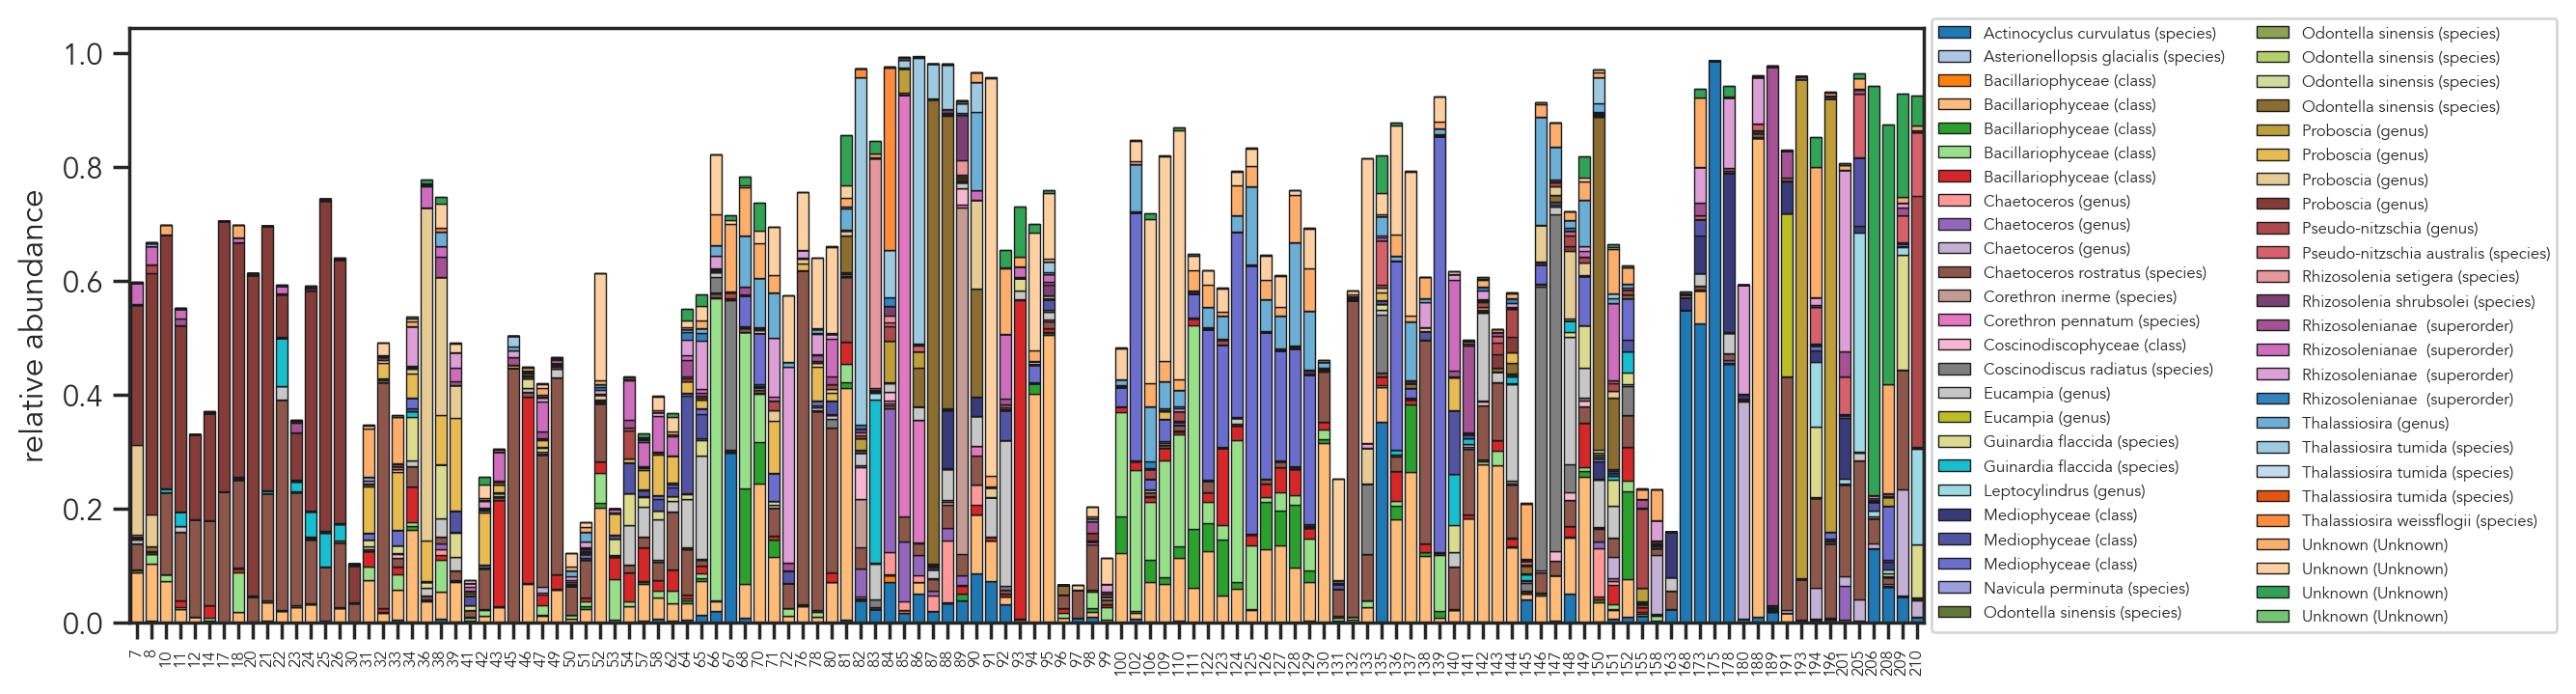

In [11]:
# sort rows by increasing total counts 
counts = Abundances.loc[Abundances.sum(axis=1).sort_values(ascending=False).index]
total = counts[counts>1].sum(axis=0)
columns = [c for c in counts.columns if c[-3:]=='SRF']
# sort columns by name
columns = np.sort(columns)
counts = counts.loc[topID_metaB_key.index, columns]
relative_counts = counts/total[columns]
# rename columns removing _SRF and also the 0 in front of the station number
relative_counts.columns = [c.split('_')[0] for c in relative_counts.columns]
relative_counts.columns = relative_counts.columns.str.replace(r'^0+', '', regex=True)

#relative_counts.columns = relative_counts.columns.str.replace('0','')
# rename the index using the column taxon of the topID_metaB_key, replacing NaN with 'Unknown'
relative_counts.index = topID_metaB_key['taxon'].fillna('Unknown') + ' (' + topID_metaB_key['level'].fillna('Unknown') + ')'

# sort the rows by decreasing total counts
#relative_counts = relative_counts.loc[relative_counts.sum(axis=1).sort_values(ascending=False).index]

colors = sns.color_palette('tab20', n_colors=len(relative_counts))

colors = sns.color_palette('tab20', n_colors=20)
colors += sns.color_palette('tab20b', n_colors=20)
colors += sns.color_palette('tab20c', n_colors=10)

base_palette = sns.color_palette("deep6", n_colors=8)  # Start with 10 color-blind friendly colors

# Step 2: Extend the palette by interpolating
def extend_palette(palette, n_colors):
    colors = []
    for i in range(n_colors):
        idx = i / n_colors * (len(palette) - 1)
        lower = int(np.floor(idx))
        upper = int(np.ceil(idx))
        weight = idx - lower
        color = np.add(np.multiply(1 - weight, palette[lower]), np.multiply(weight, palette[upper]))
        colors.append(tuple(color))
    return colors

# Generate a palette of 50 distinguishable colors
#colors = extend_palette(base_palette, 50)
# shuffle the colors

fig, ax = plt.subplots(1,1,figsize=(12,4))
# make a stacked bar chart where the x-axis are the columns, and the y-axis are the rows
# the height of each bar is the abundance of the OTU in that station
for i in range(len(relative_counts))[:]:
    ax.bar(np.arange(len(relative_counts.columns)), relative_counts.iloc[i], bottom=relative_counts.iloc[:i].sum(), color=colors[i], alpha=1, label=relative_counts.index[i], edgecolor='k', lw=0.5)
    
ax.set_xticks(np.arange(len(relative_counts.columns)))
ax.set_xticklabels(relative_counts.columns, rotation=90, fontsize=6)
ax.set_xlim(-0.5, len(relative_counts.columns)-0.5)
ax.set_ylabel('relative abundance')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, fontsize=6)

figname = 'relative_abundance_stacked_bar_chart'
fig.savefig(fig_dir+figname+'.pdf', bbox_inches='tight')

In [12]:
import matplotlib.patches as mpatches
import textwrap

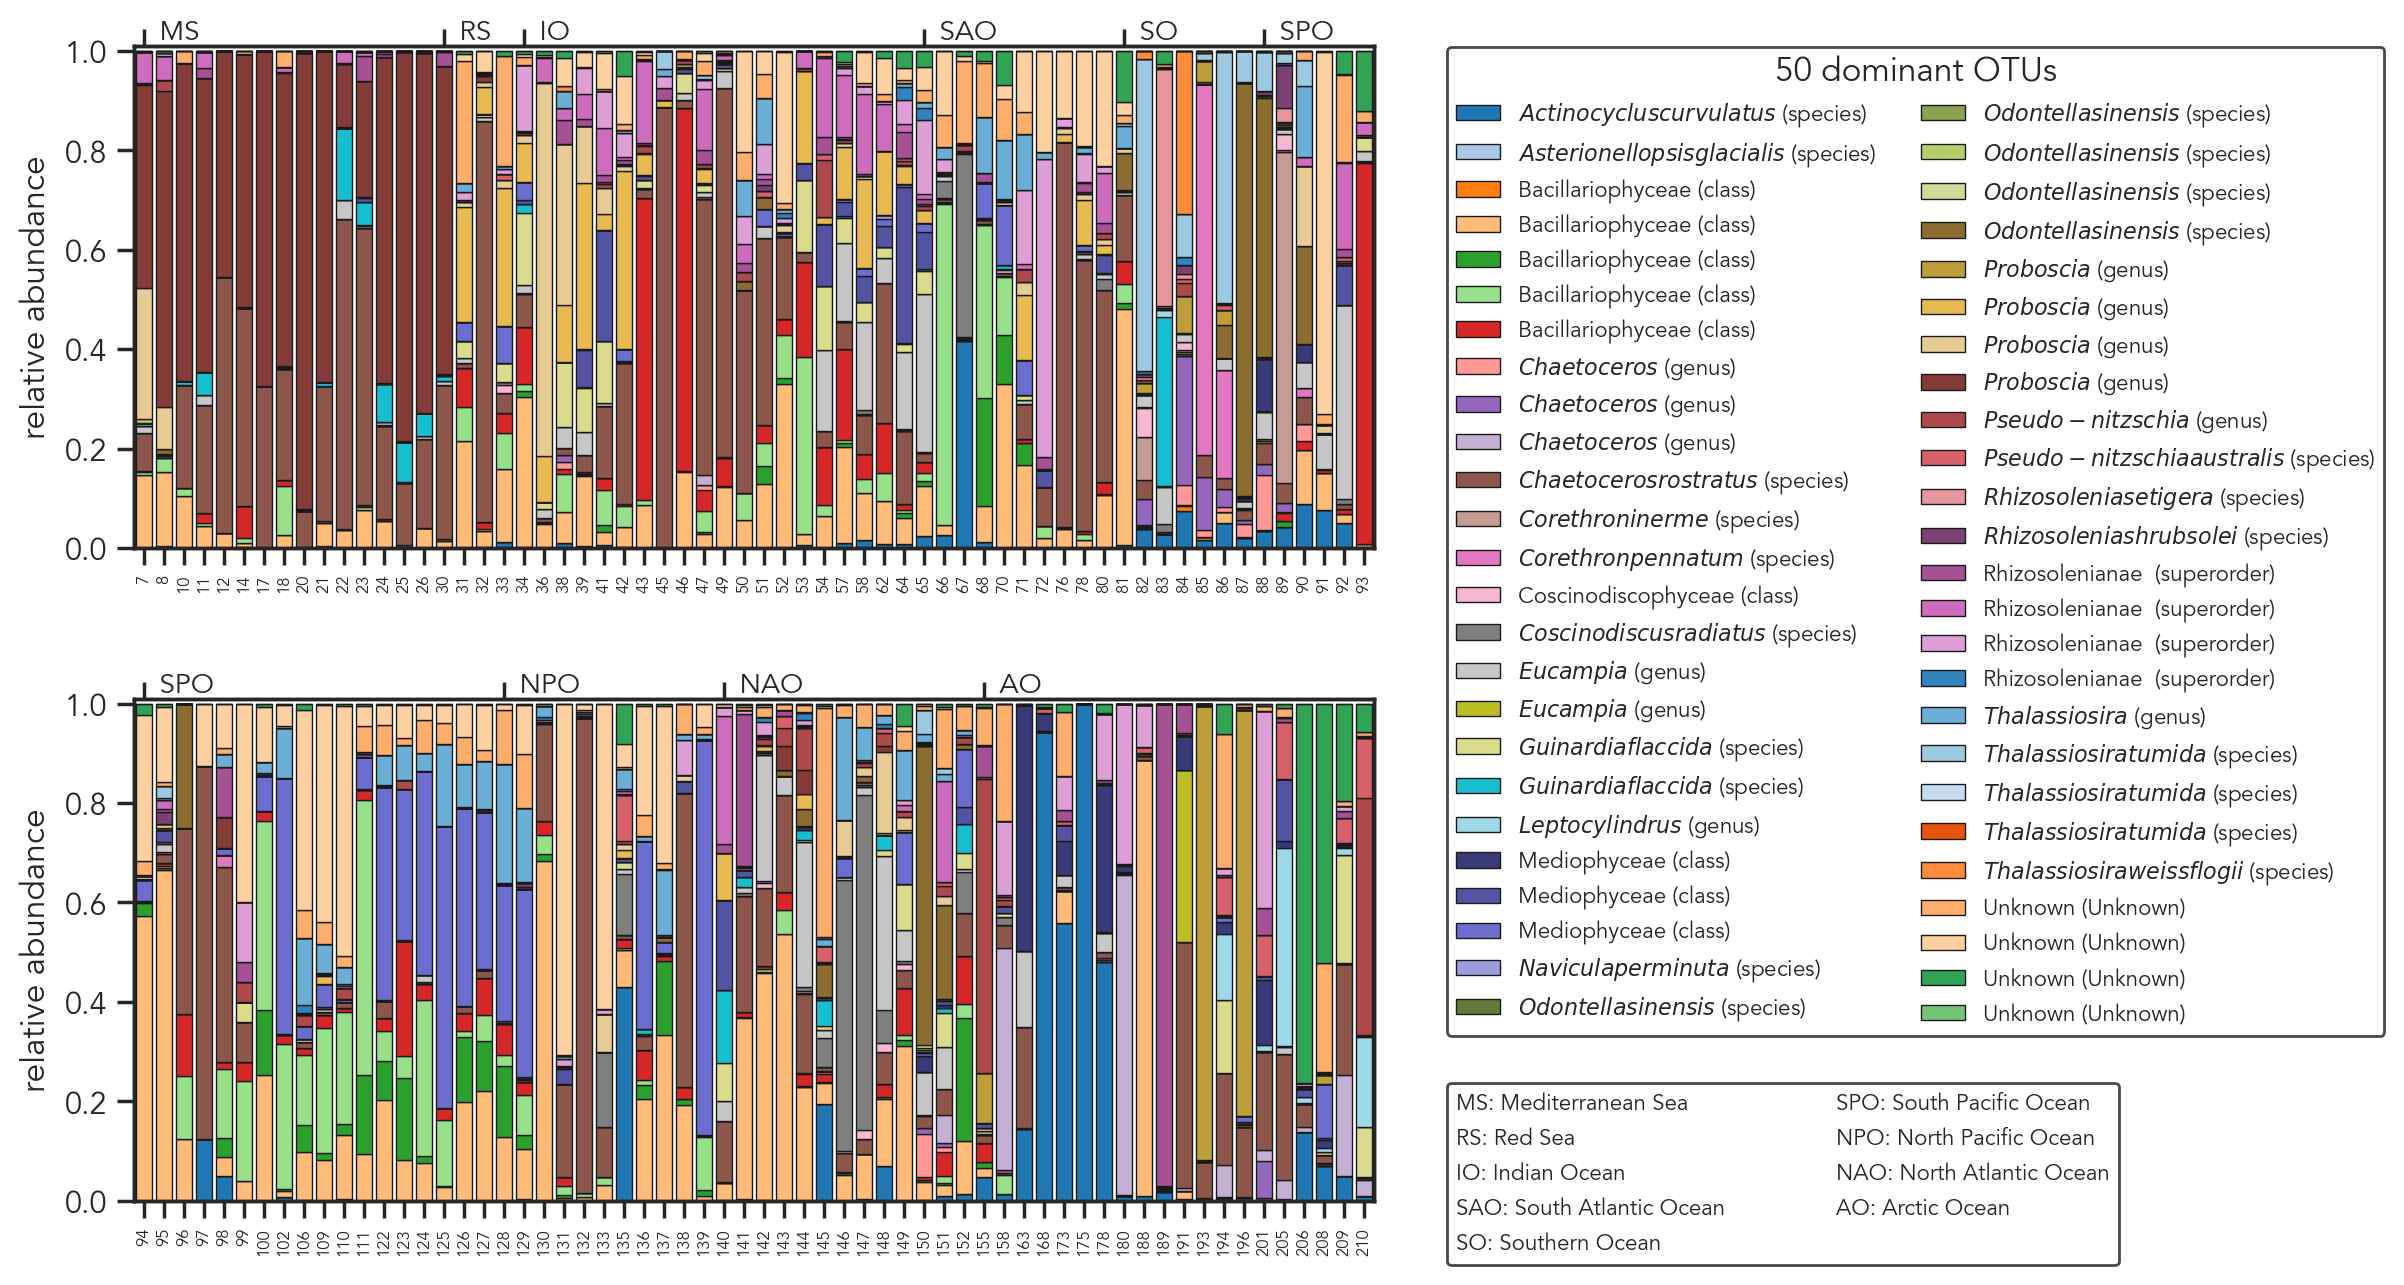

In [17]:
# sort rows by increasing total counts 
counts = Abundances#.loc[Abundances.sum(axis=1).sort_values(ascending=False).index]
total = counts[counts>1].sum(axis=0)
columns = [c for c in counts.columns if c[-3:]=='SRF']
# sort columns by name
columns = np.sort(columns)
counts = counts.loc[topID_metaB_key.index, columns]
relative_counts = counts/counts.sum()
# rename columns removing _SRF and also the 0 in front of the station number
relative_counts.columns = [c.split('_')[0] for c in relative_counts.columns]
relative_counts.columns = relative_counts.columns.str.replace(r'^0+', '', regex=True)

#relative_counts.columns = relative_counts.columns.str.replace('0','')
# rename the index using the column taxon of the topID_metaB_key, replacing NaN with 'Unknown'
relative_counts.index = topID_metaB_key['taxon'].fillna('Unknown') + ' (' + topID_metaB_key['level'].fillna('Unknown') + ')'
# sort index in alphabetical order
#relative_counts = relative_counts.loc[relative_counts.index.sort_values()]

# sort the rows by decreasing total counts
#relative_counts = relative_counts.loc[relative_counts.sum(axis=1).sort_values(ascending=False).index]

colors = sns.color_palette('tab20', n_colors=len(relative_counts))

colors = sns.color_palette('tab20', n_colors=20)
colors += sns.color_palette('tab20b', n_colors=20)
colors += sns.color_palette('tab20c', n_colors=10)

fig, axes = plt.subplots(2,1,figsize=(8,7.5))
fig.subplots_adjust(hspace=0.3)
# make a stacked bar chart where the x-axis are the columns, and the y-axis are the rows
# the height of each bar is the abundance of the OTU in that station

for i in range(len(relative_counts))[:]:
    label = relative_counts.index[i]
    # if label end with (species) or (genus) transform it to italic
    if (label[-7:] == '(genus)'):
        label = r"$" + label[:-7] + "$" + ' (genus)'
    elif (label[-9:] == '(species)'):
        label = r"$" + label[:-9] + "$" + ' (species)'

    axes[0].bar(np.arange(len(relative_counts.columns)//2), relative_counts.iloc[i, :len(relative_counts.columns)//2], bottom=relative_counts.iloc[:i, :len(relative_counts.columns)//2].sum(), color=colors[i], alpha=1, label=label, edgecolor='k', lw=0.5)
    axes[1].bar(np.arange(len(relative_counts.columns)//2), relative_counts.iloc[i, len(relative_counts.columns)//2:], bottom=relative_counts.iloc[:i, len(relative_counts.columns)//2:].sum(), color=colors[i], alpha=1, edgecolor='k', lw=0.5)


axes[0].set_xticks(np.arange(len(relative_counts.columns)//2))
xtick_labels = relative_counts.columns[:len(relative_counts.columns)//2]
axes[0].set_xticklabels(xtick_labels, rotation=90, fontsize=6)
axes[0].set_xlim(-0.5, len(relative_counts.columns)//2-0.5)
axes[0].set_ylim(0, 1.01)
axes[0].set_ylabel('relative abundance')
axes[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1.02), ncol=2, fontsize=8, title='50 dominant OTUs', frameon=True)
# set the frame color of the legend
axes[0].get_legend().get_frame().set_edgecolor('k')

axes[1].set_xticks(np.arange(len(relative_counts.columns)//2))
xtick_labels = relative_counts.columns[len(relative_counts.columns)//2:]
axes[1].set_xticklabels(xtick_labels, rotation=90, fontsize=6)
axes[1].set_xlim(-0.5, len(relative_counts.columns)//2-0.5)
axes[1].set_ylim(0, 1.01)
axes[1].set_ylabel('relative abundance')
  

ax_top = axes[0].twiny()
ax_top.set_xlim(axes[0].get_xlim()) 
xticks = [0, 15, 19, 39, 49, 56, ]
xticks_labels = ['  MS', '  RS', '  IO', '  SAO', '  SO', '  SPO']
ax_top.set_xticks(xticks)
ax_top.set_xticklabels(xticks_labels, fontsize=10, ha='left', va='top')

ax_top = axes[1].twiny()
ax_top.set_xlim(axes[1].get_xlim()) 
xticks = [0, 18, 29, 42]
xticks_labels = ['  SPO', '  NPO', '  NAO', '  AO']
ax_top.set_xticks(xticks)
ax_top.set_xticklabels(xticks_labels, fontsize=10, ha='left', va='top')

ocean_acronyms = ['MS', 'RS', 'IO', 'SAO', 'SO', 'SPO', 'NPO', 'NAO', 'AO']
ocean_names = [
    'Mediterranean Sea', 'Red Sea', 'Indian Ocean', 
    'South Atlantic Ocean', 'Southern Ocean', 
    'South Pacific Ocean', 'North Pacific Ocean', 'North Atlantic Ocean',
    'Arctic Ocean'
]


# Combine acronyms and names
legend_items = [f"{acronym}: {name}" for acronym, name in zip(ocean_acronyms, ocean_names)]

# Split into two columns
columns = 2
mid = len(legend_items) // columns
col1 = legend_items[:mid]
col2 = legend_items[mid:]

# Create fake legend entries for each column
handles = [plt.Line2D([0], [0], color='white', label=item) for item in col1 + col2]

# Add the fake legend to axes[1]
legend = axes[1].legend(
    handles=handles, loc='lower left', frameon=True, fontsize=8, #title='ocean basins', title_fontsize=12, 
    ncol=2, handlelength=0, handletextpad=0, bbox_to_anchor=(1.05, -0.15), columnspacing=5
)

# Align legend text
for text in legend.get_texts():
    text.set_ha("left")
    
axes[1].get_legend().get_frame().set_edgecolor('k')


figname = 'OTU_relative_abundance_stacked_bar_chart'
fig.savefig(supfig_dir+figname+'.png', bbox_inches='tight', dpi=300)

In [31]:
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.html'] = True

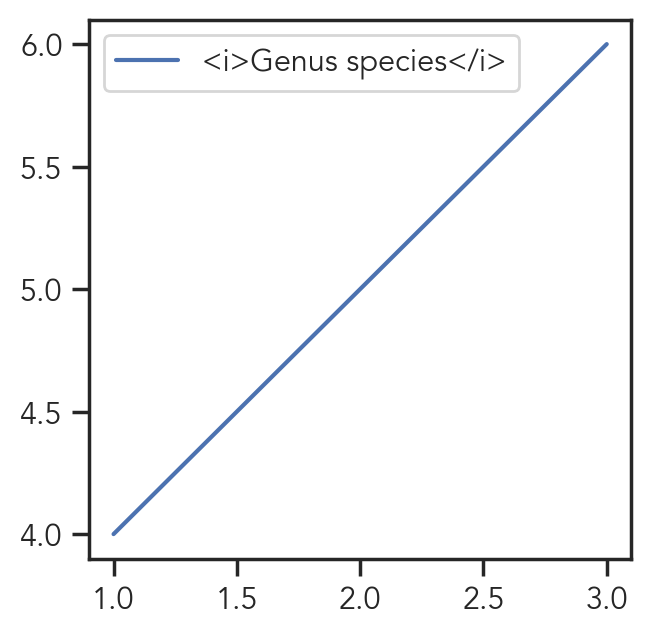

In [29]:
import matplotlib.pyplot as plt

# Dati
x = [1, 2, 3]
y = [4, 5, 6]

# Creazione del grafico
plt.plot(x, y, label="<i>Genus species</i>")  # Usa HTML per l'italico nella label

# Aggiunta della legenda
plt.legend()

# Mostra il grafico
plt.show()

## Bray-Curtis dissimilarity

In [26]:
# compute the Bray-Curtis dissimilarity matrix from the matrix of relative counts, where the columns are the stations and the rows are the OTUs
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, squareform

# compute the Bray-Curtis dissimilarity matrix
dissimilarity_matrix = pdist(relative_counts.T, metric='braycurtis')
dissimilarity_matrix = squareform(dissimilarity_matrix)
dissimilarity_matrix = pd.DataFrame(dissimilarity_matrix, index=relative_counts.columns, columns=relative_counts.columns)

# plot the Bray-Curtis dissimilarity matrix


In [79]:
paletteTGB = ['#4caf50', '#504B43', '#948d99']
metaTcolor, metaGcolor, metaBcolor = paletteTGB

/var/folders/c6/wyfkjjbx7951r06nx266f2z80000gn/T/ipykernel_48239/3615075391.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), rotation=0, fontsize=fontsize)


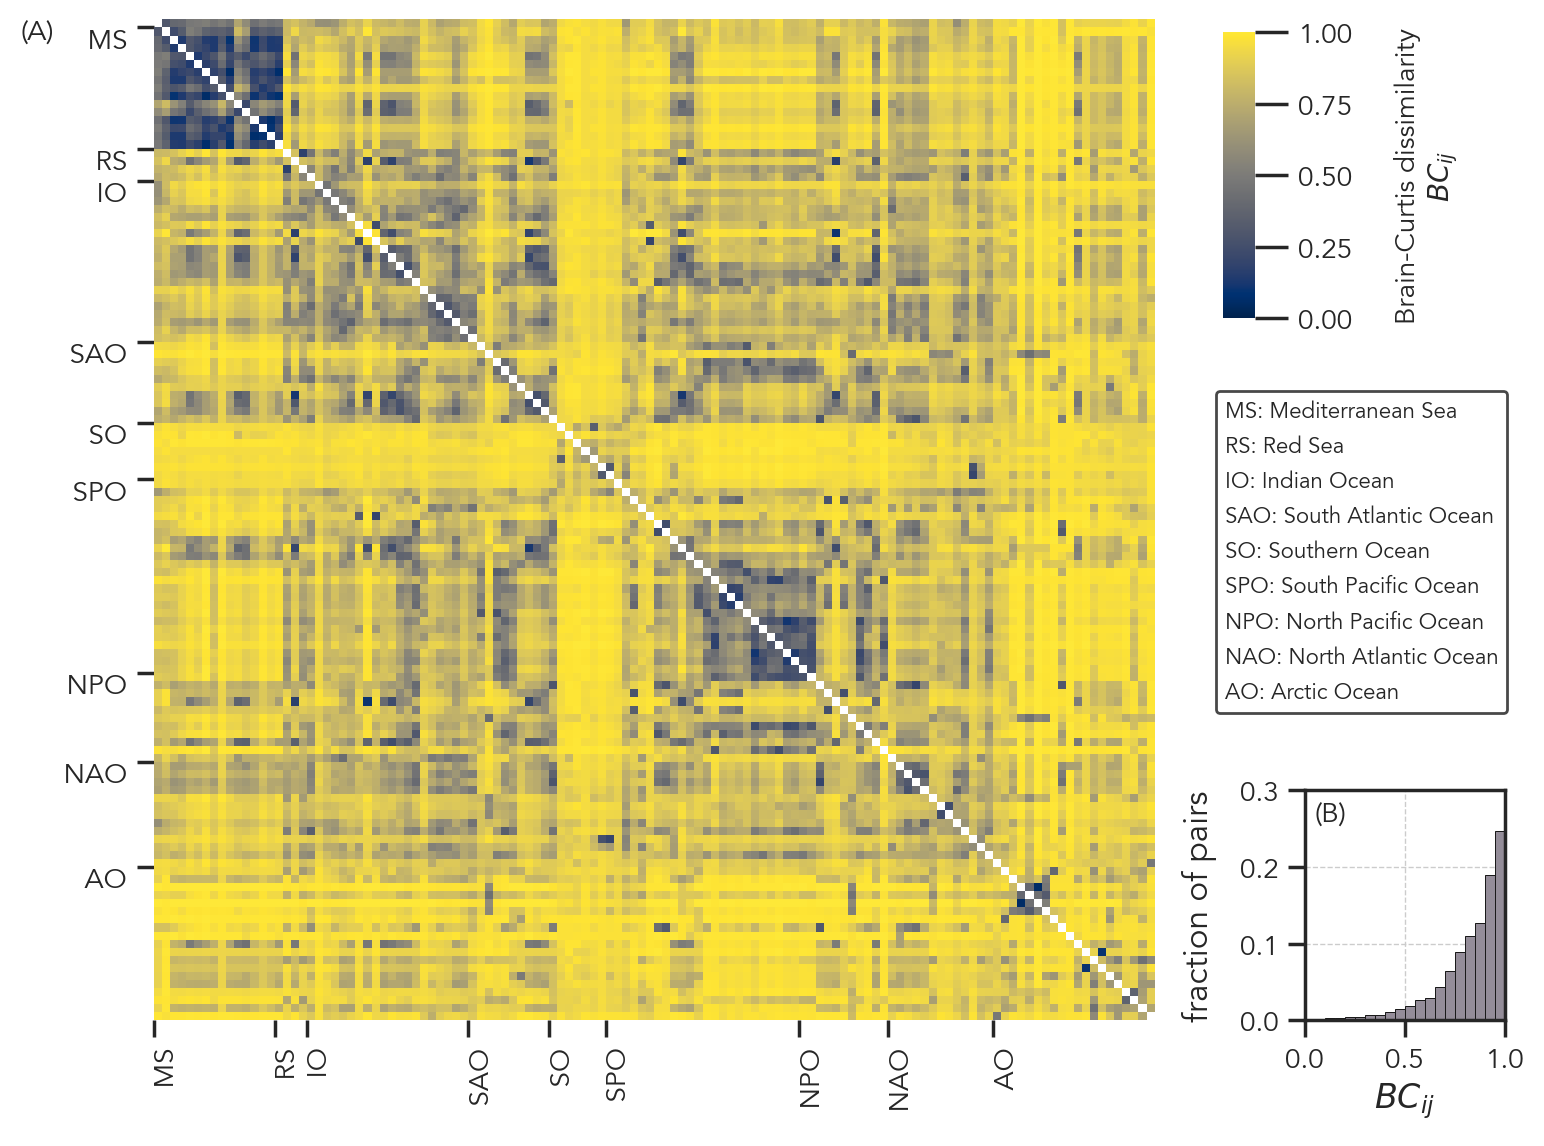

In [114]:
fig, ax = plt.subplots(figsize=(6.5,6.5))
fontsize = 10
ax.text(-0.1, 1., '(A)', fontsize=fontsize, ha='right', va='top', transform=ax.transAxes)

# text = '(A)'
# ax.text(0.0, 1.1, text, fontsize=fontsize, ha='center', va='top', transform=ax.transAxes)
cmap = 'cividis'

cbar_ax = fig.add_axes([0.95, 0.65, 0.025, 0.22])
mask = np.triu(np.ones_like(dissimilarity_matrix, dtype=bool))
mask = np.diag(np.ones_like(mask[0], dtype=bool))
sns.heatmap(dissimilarity_matrix, ax=ax, cmap=cmap, mask=mask, 
            cbar_ax=cbar_ax,
            cbar_kws={'shrink': 0.35, 'pad':0.15, #'ticks':ticks,# 'set_yticklabels':ticks_labels,
                      'orientation': 'vertical', 
                      'extend':'neither',
                      'label': r'$BC_{ij}$', 'aspect': 6},
            square=True,
            vmin=0, vmax=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=fontsize+2, size=fontsize+2)
# change the rotation of the labels
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), rotation=0, fontsize=fontsize)
label = "Brain-Curtis dissimilarity\n"
label += r"$BC_{ij}$"
cbar.ax.set_ylabel(label, fontsize=fontsize, labelpad=15, rotation=90)

xticks = [0, 15, 19, 39, 49, 56, 62+18, 62+29, 62+42]
yticks = [x+1 for x in xticks]
xticks_labels = ['  MS', '  RS', '  IO', '  SAO', '  SO', '  SPO',  '  NPO', '  NAO', '  AO']

ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels, fontsize=10, ha='left', va='top')
ax.set_yticks(yticks)
ax.set_yticklabels(xticks_labels, fontsize=10, ha='right', va='top')

ocean_acronyms = ['MS', 'RS', 'IO', 'SAO', 'SO', 'SPO', 'NPO', 'NAO', 'AO']
ocean_names = [
    'Mediterranean Sea', 'Red Sea', 'Indian Ocean', 
    'South Atlantic Ocean', 'Southern Ocean', 
    'South Pacific Ocean', 'North Pacific Ocean', 'North Atlantic Ocean',
    'Arctic Ocean'
]


# Combine acronyms and names
legend_items = [f"{acronym}: {name}" for acronym, name in zip(ocean_acronyms, ocean_names)]

# Split into two columns
columns = 2
mid = len(legend_items) // columns
col1 = legend_items[:mid]
col2 = legend_items[mid:]

# Create fake legend entries for each column
handles = [plt.Line2D([0], [0], color='white', label=item) for item in col1 + col2]

# Add the fake legend to axes[1]
legend = ax.legend(
    handles=handles, loc='upper left', frameon=True, fontsize=8, #title='ocean basins', title_fontsize=12, 
    ncol=1, handlelength=0, handletextpad=0, bbox_to_anchor=(1.05, 0.64), columnspacing=5
)

# Align legend text
for text in legend.get_texts():
    text.set_ha("left")
    
ax.get_legend().get_frame().set_edgecolor('k')

axin = ax.inset_axes([1.15, 0., 0.2, 0.23])
axin.set_ylabel('fraction of pairs', fontsize=fontsize+2, labelpad=8)
axin.set_xlabel(r'$BC_{ij}$', fontsize=fontsize+2, labelpad=2)
axin.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=-1)
axin.tick_params(axis='both', which='major', labelsize=fontsize)
axin.text(0.05, 0.95, '(B)', fontsize=fontsize, ha='left', va='top', transform=axin.transAxes)
# set xticks and yticks fontsize
axin.set_xlim(0, 1.)
axin.set_ylim(0, 0.3)
values = dissimilarity_matrix.mask(np.triu(np.ones_like(dissimilarity_matrix, dtype=bool))).values
values = values[~np.isnan(values)]
bins = np.arange(0., 1.05, 0.05)

sns.histplot(values, bins=bins, kde=False, color=metaBcolor, ax=axin, stat='probability', alpha=1, edgecolor='k') 

plt.show()
figname = 'Bray_Curtis_dissimilarity_matrix'
for fmt in fig_formats:
    fig.savefig(supfig_dir+figname+fmt, bbox_inches='tight', dpi=300)


## SAD 173

bins [1.00000000e+00 1.51283251e+00 2.28866219e+00 3.46236256e+00
 5.23797464e+00 7.92417830e+00 1.19879545e+01 1.81357673e+01
 2.74363783e+01 4.15066450e+01 6.27926017e+01 9.49946891e+01
 1.43711054e+02 2.17410754e+02 3.28906055e+02 4.97579772e+02
 7.52754854e+02 1.13879201e+03 1.72280158e+03 2.60631023e+03
 3.94291083e+03 5.96496368e+03 9.02399096e+03 1.36517869e+04
 2.06528669e+04 3.12443285e+04 4.72674357e+04 7.15077133e+04
 1.08179193e+05 1.63657000e+05]
counts [156  64  28  39  25  18  20  13  14   8   3   9   2   5   0   0   1   4
   2   0   3   3   0   3   0   1   0   0   0]


/var/folders/c6/wyfkjjbx7951r06nx266f2z80000gn/T/ipykernel_59869/1139991405.py:143: UserWarning: FixedFormatter should only be used together with FixedLocator
  axin.set_xticklabels(['{:.0f}%'.format(x*100) for x in [0.6, 0.8, 1.]], fontsize=fontsize-4)
/var/folders/c6/wyfkjjbx7951r06nx266f2z80000gn/T/ipykernel_59869/1139991405.py:144: UserWarning: FixedFormatter should only be used together with FixedLocator
  axin.set_yticklabels(['{:.0f}'.format(x) for x in axin.get_yticks()], fontsize=fontsize-4)


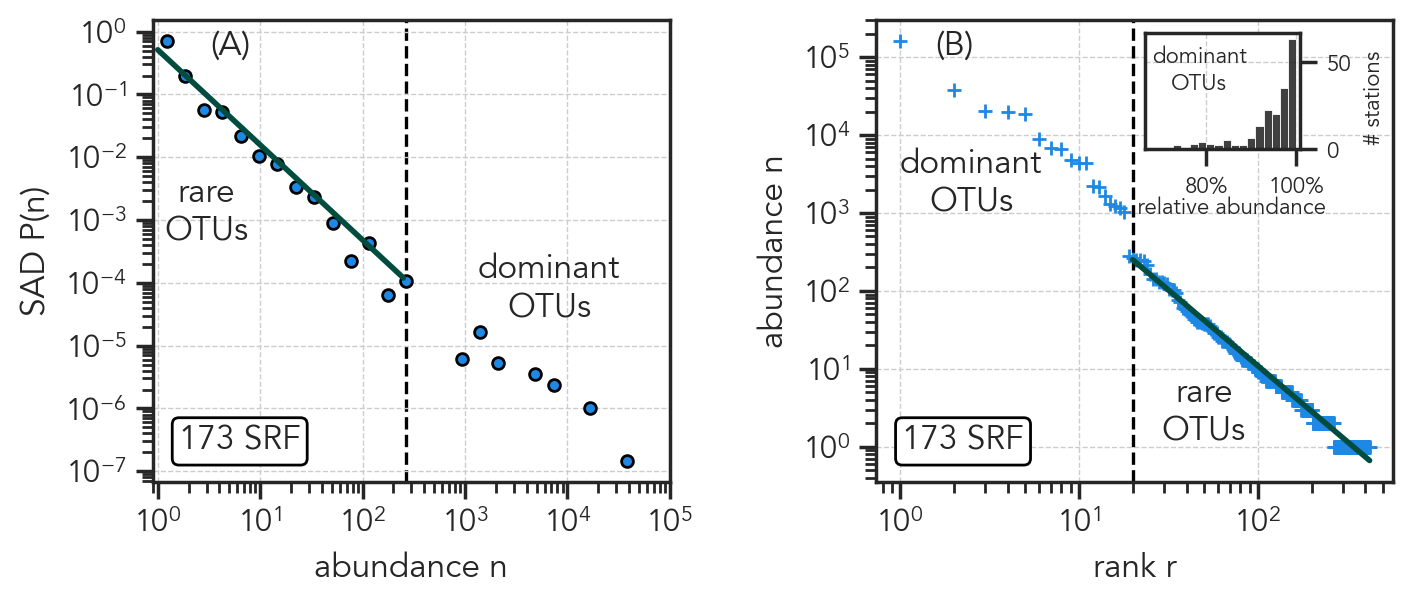

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,3), sharey=False, sharex=False, constrained_layout=False)
fig.subplots_adjust(wspace=.4)  # Adjust horizontal space between subplots

fontsize = 12

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')


station = 173
depth = 'SRF'
column = str(station)+'_'+depth

#fig.suptitle('Station {} - {}'.format(station, depth), fontsize=fontsize)

data = Abundances[column]
data = data[data>=abundance_thsh]
data = data.sort_values(ascending=False)
rank = np.arange(1,len(data)+1)

bloom_data = data[:number_of_bloomers]
bulk_data = data[number_of_bloomers:]

# SAD 
bins, counts, prob, pdf = pt.log_hist(data, 30)
print('bins', bins)
print('counts', counts)
x, y = plot_SAD(data, 30)
ax = axes[0]
sns.scatterplot(x=x, y=y, ax=ax, color='#1E88E5', marker='o', edgecolor='black', linewidth=1, s=18)
ax.set_xlabel('abundance n', fontsize=fontsize)
ax.set_ylabel('SAD P(n)', fontsize=fontsize)
ax.yaxis.set_major_locator(tck.LogLocator(base=10.0, numticks=10))  # Major ticks
ax.yaxis.set_minor_locator(tck.LogLocator(base=10.0, subs='auto', numticks=10))  # Minor ticks
ax.yaxis.set_minor_formatter(tck.NullFormatter())  # Remove minor ticks' labels
ax.xaxis.set_major_locator(tck.LogLocator(base=10.0, numticks=10))  # Major ticks
ax.xaxis.set_minor_locator(tck.LogLocator(base=10.0, subs='auto', numticks=10))  # Minor ticks
ax.xaxis.set_minor_formatter(tck.NullFormatter())  # Remove minor ticks' labels

# power-law distribution fit
rho = rho_bulk[column]
x_bulk = np.linspace(np.min(bulk_data), np.max(bulk_data), 100)
label = r'$\rho = {:.2f}$'.format(rho)
y = xmin**(rho)*rho*x_bulk**(-1-rho)
sns.lineplot(x=x_bulk, y=y, ax=ax, color='#004D40', linestyle='-', linewidth=2., label=label)
  
# power-law distribution fit with linear regression
rho_linear = rho_linear_fit[column]
label = r'$\rho = {:.2f}$'.format(rho_linear)
y = xmin**(rho_linear)*rho_linear*x_bulk**(-1-rho_linear)
#sns.lineplot(x=x_bulk, y=y, ax=ax, color='forestgreen', linestyle='--', linewidth=1, label=label)  
  
# reference exponent
rho_ref = 0.5
label = r'$\rho = {:.2f}$'.format(rho_ref)
y = xmin**(rho_ref)*rho_ref*x_bulk**(-1-rho_ref)
#sns.lineplot(x=x_bulk, y=y, ax=ax, color='coral', linestyle='--', linewidth=1, label=label)
ax.legend(fontsize=fontsize)
# remove legend
ax.get_legend().remove() 

# axvlines for bloomers
abundance_of_the_last_bloomer = bloom_data.iloc[-1]
ax.axvline(abundance_of_the_last_bloomer, color='black', linestyle='--', linewidth=1.2, zorder = 0)

ax.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=-1)
ax.set_xticks([1, 10, 100, 1000, 10000, 1e5])
ax.set_xlim(0.9, 1e5)


text = 'rare\nOTUs'
ax.text(3, 5e-3, text, fontsize=fontsize, ha='center', va='top')
text = 'dominant\nOTUs'
ax.text(abundance_of_the_last_bloomer*25, 3e-4, text, fontsize=fontsize, ha='center', va='top')

text = '173 SRF'
ax.text(0.05, 0.05, text, fontsize=fontsize, ha='left', va='bottom', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))






# RAD
ax = axes[1]
ax.yaxis.set_major_locator(tck.LogLocator(base=10.0, numticks=10))  # Major ticks
ax.yaxis.set_minor_locator(tck.LogLocator(base=10.0, subs='auto', numticks=10))  # Minor ticks
ax.yaxis.set_minor_formatter(tck.NullFormatter())  # Remove minor ticks' labels
ax.xaxis.set_major_locator(tck.LogLocator(base=10.0, numticks=10))  # Major ticks
ax.xaxis.set_minor_locator(tck.LogLocator(base=10.0, subs='auto', numticks=10))  # Minor ticks
ax.xaxis.set_minor_formatter(tck.NullFormatter())  # Remove minor ticks' labels
ax.axvline(number_of_bloomers, color='black', linestyle='--', linewidth=1.2)
sns.scatterplot(x=rank, y=data, ax=ax, color='#1E88E5', marker='+', linewidth=1, s=25)
ax.set_xlabel('rank r', fontsize=fontsize)
ax.set_ylabel('abundance n', fontsize=fontsize)
# power-law distribution fit
y = xmin*(rank/(len(data)))**(-1/rho)/1.5
sns.lineplot(x=rank[rank>=number_of_bloomers], y=y[rank>=number_of_bloomers], ax=ax, color='#004D40', linestyle='-', linewidth=2)
# power-law distribution fit with linear regression
y = xmin*(rank/(len(data)))**(-1/rho_linear)
#sns.lineplot(x=rank, y=y, ax=ax, color='forestgreen', linestyle='--', linewidth=1)
# reference exponent
y_ref = xmin*(rank/(len(data)))**(-1/rho_ref)
#sns.lineplot(x=rank, y=y_ref, ax=ax, color='coral', linestyle='--', linewidth=1)

# RAD bulk 
#axin = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
#axin.set_xscale('log')
#axin.set_yscale('log')

rank_bulks = np.arange(1,len(data)-number_of_bloomers+1)
#sns.scatterplot(x=rank_bulks, y=data[number_of_bloomers:], ax=ax, color='black', marker='+', linewidth=1, s=20)
#y_bulks = ((rank_bulks-number_of_bloomers+1)/(len(data)))**(-1/rho)
#sns.lineplot(x=rank_bulks, y=y_bulks, ax=ax, color='firebrick', linestyle='--', linewidth=1)

ax.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=-1)

text = 'rare\nOTUs'
ax.text(50, 8, text, fontsize=fontsize, ha='center', va='top')
text = 'dominant\nOTUs'
ax.text(2.5, 0.7e4, text, fontsize=fontsize, ha='center', va='top')

text = '173 SRF'
ax.text(0.05, 0.05, text, fontsize=fontsize, ha='left', va='bottom', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))


biomass_bloom_values = list(biomass_bloom.values())
biomass_bulks_values = list(biomass_bulk.values())
biomass_bulks_total = np.array(biomass_bulks_values) + np.array(biomass_bloom_values)
relative_biomass_bloom = np.array(biomass_bloom_values)/biomass_bulks_total
relative_biomass_bulk = np.array(biomass_bulks_values)/biomass_bulks_total
axin = ax.inset_axes([0.52, 0.72, 0.3, 0.25])
axin.set_xlim(0.58, 1.01)
sns.histplot(relative_biomass_bloom, ax=axin, bins=15, color='black', kde=False)
axin.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=-1)
# move x ticks to the right
axin.yaxis.set_ticks_position('right')
axin.yaxis.set_label_position('right')
axin.set_xlabel("   relative abundance", fontsize=fontsize-4, labelpad=-1, ha='center')
axin.set_ylabel("# stations  ", fontsize=fontsize-4)
axin.text(0.35, 0.9, 'dominant\nOTUs', fontsize=fontsize-4, ha='center', va='top', transform=axin.transAxes)
axin.set_xticklabels(['{:.0f}%'.format(x*100) for x in [0.6, 0.8, 1.]], fontsize=fontsize-4)
axin.set_yticklabels(['{:.0f}'.format(x) for x in axin.get_yticks()], fontsize=fontsize-4)




text = '(A)'
axes[0].text(0.15, 0.98, text, fontsize=fontsize, ha='center', va='top', transform=axes[0].transAxes)
text = '(B)'
axes[1].text(0.15, 0.98, text, fontsize=fontsize, ha='center', va='top', transform=axes[1].transAxes)

plt.show()
figname = '173_SRF_SAD_RAD.png'
fig.savefig(supfig_dir+figname, bbox_inches='tight', dpi=300)


In [ ]:
biomass_bulks_total

array([   2629,  851412,  188899,  213122,   29451,  364698,  215378,
       1386577,  282734,  312059,   17962,  386849,  240992,  481651,
        377267,   27770,   13806,  106013, 1558148,    2440,     301,
         24030,   70894, 2358719,   28138, 1125573,   65395,  615241,
           928,     285,    2805,   22939,   21623,   30571,   53327,
         14178,   12347,    2122,     810,    8532,    2903,   35998,
         50745,    5402,    7541,  103593,    7549,  165376,    1207,
          1032,     843,     486,    1839,    2020,    2586,    7093,
           280,    1757,    1930,     388,    2704,     619,    7560,
           353,   39274,   25645,   12452,   13008,   42937,   51207,
          8290,   16333,   56476,   63203,    7586,    4161,   15253,
         20360,    6702,    4175,   13752,   11493,     197,    7076,
           179,   17655,    8722,   12908,   20251,   22632,   10120,
          5411,    1956,    1952,     434,     399,     782,    2011,
          3895,   26

In [ ]:
biomass_bulks_total

In [ ]:


# station = 205
# depth = 'SRF'
# column = str(station)+'_'+depth

# data = Abundances[column]

# # Data: Assuming these values from the plot
# abundance_classes = np.arange(0, np.log2(data.max())+1, 1)  # log scale classes
# number_of_species = np.histogram(np.log2(data), bins=abundance_classes)[0] # number of species

# # Setting style elements
# plt.style.use('bmh')  # Using a pre-defined style to get a similar aesthetic

# # Set font globally to Times New Roman
# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.size'] = 12

# # Create figure and axis objects
# fig, ax = plt.subplots(figsize=(3, 2))
# ax.set_xlim(0,9.5)

# # Create a bar plot
# bars = ax.bar(abundance_classes[1:], number_of_species, color='lightgray', width=0.8, edgecolor='black', linewidth=1.0)


# # polyfit
# x = np.arange(1.15, 10,.1)
# y = 250*x**-1.45
# ax.plot(x,y,"r-")


# # Adding labels and title
# ax.set_xlabel('Abundance classes [log scale]')
# ax.set_ylabel('Number of species')
# # color in rgb is 213, 57, 46
# color = (213./255, 57./255, 46./255)
# # convert to hex

# #ax.set_title('Diatoms', color=color, weight='bold', size=14)

# # Customize ticks
# ax.tick_params(axis='both', which='major', labelsize=10, labelcolor='black', direction='in')

# # white background
# ax.set_facecolor('white')

# # Remove grid
# ax.grid(False)

# # only x and y axis visible in black
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_color('black')
# ax.spines['left'].set_color('black')

# # increase the space between the title and the plot


# # Show the plot
# plt.show()


[1.00000000e-05 1.77827941e-05 3.16227766e-05 5.62341325e-05
 1.00000000e-04 1.77827941e-04 3.16227766e-04 5.62341325e-04
 1.00000000e-03 1.77827941e-03 3.16227766e-03 5.62341325e-03
 1.00000000e-02 1.77827941e-02 3.16227766e-02 5.62341325e-02
 1.00000000e-01 1.77827941e-01 3.16227766e-01 5.62341325e-01
 1.00000000e+00]


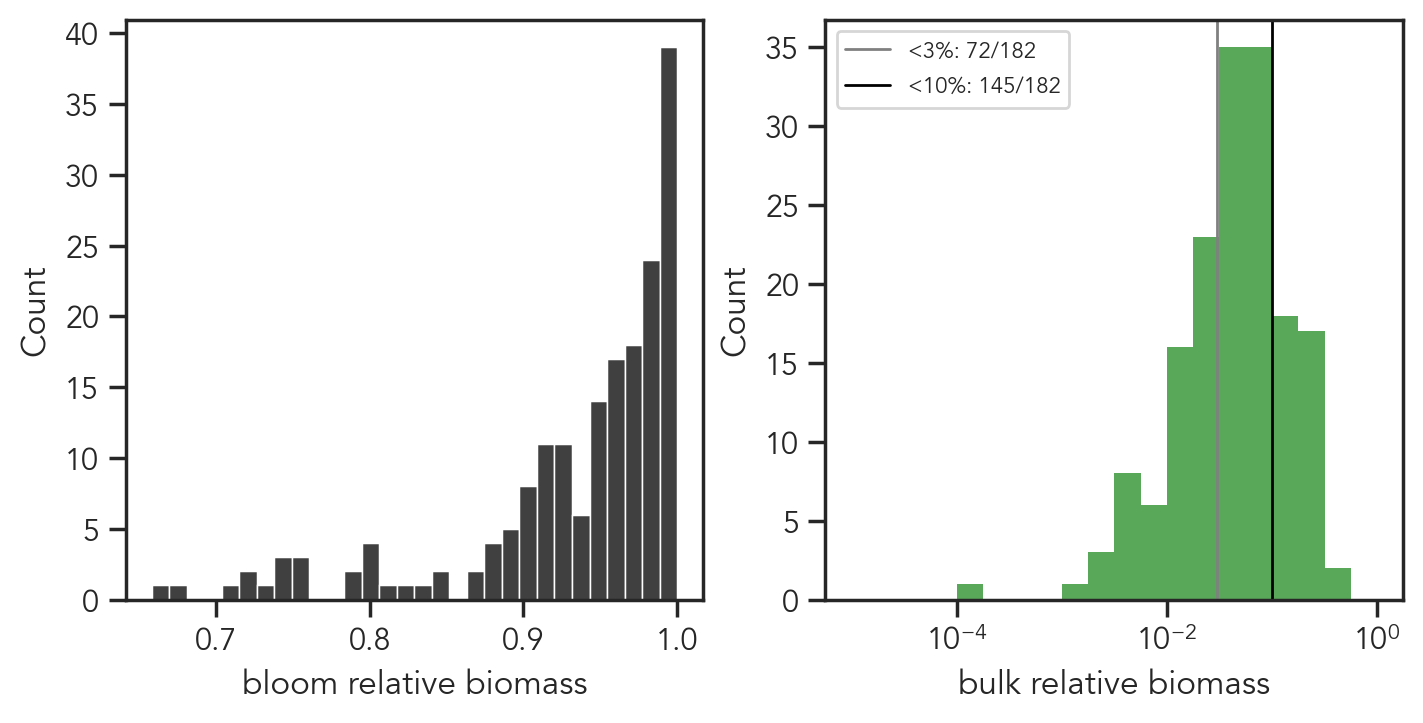

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(7,3.5), sharey=False, sharex=False, constrained_layout=True)

# biomass distribution of the bloomers
#ax.set_yscale('log')
biomass_bloom_values = list(biomass_bloom.values())
biomass_bulks_values = list(biomass_bulk.values())
biomass_bulks_total = np.array(biomass_bulks_values) + np.array(biomass_bloom_values)
relative_biomass_bloom = np.array(biomass_bloom_values)/biomass_bulks_total
relative_biomass_bulk = np.array(biomass_bulks_values)/biomass_bulks_total

# logspaced bins for the histogram of relative biomass
ax = axes[0]
ax.set_xlabel('bloom relative biomass')
sns.histplot(relative_biomass_bloom, ax=ax, bins=30, color='black', kde=False)
# draw

ax = axes[1]
ax.set_xlabel('bulk relative biomass')
bins = np.logspace(-5,-0,21)
print(bins)
sns.histplot(relative_biomass_bulk, ax=ax, bins=bins, color='forestgreen', edgecolor='k', lw=10)
ax.set_xscale('log')
# label is the number of stations with a relative biomass in the bin less than 1%
label = r'<3%: {}/{}'.format(len(relative_biomass_bulk[relative_biomass_bulk<3e-2]), len(relative_biomass_bulk))
ax.axvline(3e-2, color='grey', linestyle='-', linewidth=1, label=label)
label = r'<10%: {}/{}'.format(len(relative_biomass_bulk[relative_biomass_bulk<1e-1]), len(relative_biomass_bulk))
ax.axvline(1e-1, color='black', linestyle='-', linewidth=1, label=label)
# add a text close to the line with the percentage
ax.legend(fontsize=8)


In [ ]:
SRF_gdf = gdf[gdf['depth_category']=='SRF']
DCM_gdf = gdf[gdf['depth_category']=='DCM']

# add the relative biomass to the gdf
SRF_gdf['biomass_bloom'] = SRF_gdf['station'].map({int(key.split('_')[0]): value for key,value in biomass_bloom.items() if key[-3:]=='SRF'})
SRF_gdf['biomass_bulk'] = SRF_gdf['station'].map({int(key.split('_')[0]): value for key,value in biomass_bulk.items() if key[-3:]=='SRF'})
SRF_gdf['biomass_total'] = SRF_gdf['biomass_bloom'] + SRF_gdf['biomass_bulk']
SRF_gdf['relative_biomass_bloom'] = SRF_gdf['biomass_bloom']/SRF_gdf['biomass_total']
SRF_gdf['relative_biomass_bulk'] = SRF_gdf['biomass_bulk']/SRF_gdf['biomass_total']
SRF_gdf['richness_bloom'] = SRF_gdf['station'].map({int(key.split('_')[0]): value for key,value in richness_bloom.items() if key[-3:]=='SRF'})
SRF_gdf['richness_bulk'] = SRF_gdf['station'].map({int(key.split('_')[0]): value for key,value in richness_bulk.items() if key[-3:]=='SRF'})
SRF_gdf['richness_total'] = SRF_gdf['richness_bloom'] + SRF_gdf['richness_bulk']

DCM_gdf['biomass_bloom'] = DCM_gdf['station'].map({int(key.split('_')[0]): value for key,value in biomass_bloom.items() if key[-3:]=='DCM'})
DCM_gdf['biomass_bulk'] = DCM_gdf['station'].map({int(key.split('_')[0]): value for key,value in biomass_bulk.items() if key[-3:]=='DCM'})
DCM_gdf['biomass_total'] = DCM_gdf['biomass_bloom'] + DCM_gdf['biomass_bulk']
DCM_gdf['relative_biomass_bloom'] = DCM_gdf['biomass_bloom']/DCM_gdf['biomass_total']
DCM_gdf['relative_biomass_bulk'] = DCM_gdf['biomass_bulk']/DCM_gdf['biomass_total']
DCM_gdf['richness_bloom'] = DCM_gdf['station'].map({int(key.split('_')[0]): value for key,value in richness_bloom.items() if key[-3:]=='DCM'})
DCM_gdf['richness_bulk'] = DCM_gdf['station'].map({int(key.split('_')[0]): value for key,value in richness_bulk.items() if key[-3:]=='DCM'})
DCM_gdf['richness_total'] = DCM_gdf['richness_bloom'] + DCM_gdf['richness_bulk']


bloom_thsh = 1e-2
richness_thsh = 1

SRF_gdf['bloom'] = ((SRF_gdf['relative_biomass_bulk']<bloom_thsh) & (SRF_gdf['richness_total']>richness_thsh))
DCM_gdf['bloom'] = ((DCM_gdf['relative_biomass_bulk']<bloom_thsh) & (DCM_gdf['richness_total']>richness_thsh))

# classes 
# if the relative biomass of the bloom is less than 10% and the richness is >50, it is a hyperdominated
# if the relative biomass of the bloom is less than 10% and the richness is <50, it is a poor
# if the relative biomass of the bloom is more than 10% it is non-bloom
bloom_thsh = 2e-2
richness_thsh = 50
SRF_gdf['classes'] = SRF_gdf.apply(lambda x: 'species-rich,\nhyperdominated' if x['relative_biomass_bulk']<bloom_thsh and x['richness_total']>richness_thsh else 'species-poor' if x['relative_biomass_bulk']<bloom_thsh and x['richness_total']<richness_thsh else 'intermediate', axis=1)
SRF_gdf['classes'] = SRF_gdf['classes'].astype('category')

SRF_gdf.tail()

,station,latitude,longitude,depth_category,depth_nominal,month,SSD,temp_woa,sal_woa,no3_woa,...,biomass_bloom,biomass_bulk,biomass_total,relative_biomass_bloom,relative_biomass_bulk,richness_bloom,richness_bulk,richness_total,bloom,classes
129,205,72.4693,-71.8920,SRF,5,10,584.5,-0.89261,31.219290,1.793274,...,1548303.0,9845.0,1558148.0,0.993682,0.006318,20.0,330.0,350.0,True,"species-rich,\nhyperdominated"
130,206,70.9618,-53.6030,SRF,5,10,564.5,2.43763,32.896900,1.785118,...,359106.0,5592.0,364698.0,0.984667,0.015333,20.0,215.0,235.0,False,"species-rich,\nhyperdominated"
131,208,69.1136,-51.5086,SRF,5,10,508.0,2.93860,33.131413,1.630793,...,26499.0,1271.0,27770.0,0.954231,0.045769,20.0,84.0,104.0,False,intermediate
132,209,64.7127,-53.0106,SRF,5,10,531.5,2.51751,32.442013,3.216127,...,234758.0,6234.0,240992.0,0.974132,0.025868,20.0,255.0,275.0,False,intermediate
133,210,61.5442,-55.9865,SRF,5,10,535.0,5.20301,33.989799,3.419286,...,69382.0,1512.0,70894.0,0.978672,0.021328,20.0,99.0,119.0,False,intermediate


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: >

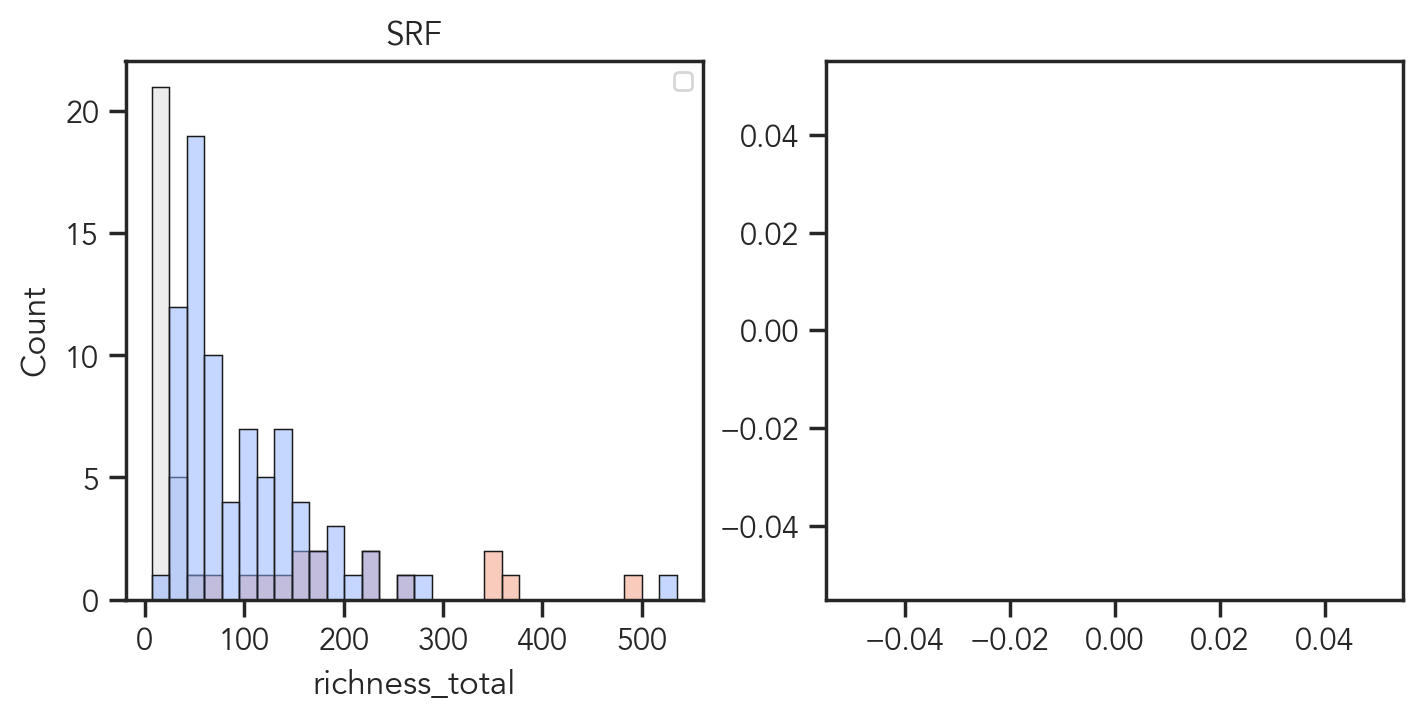

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(7,3.5), sharey=False, sharex=False, constrained_layout=True)
ax = axes[0]
sns.histplot(x='richness_total', hue='classes', data=SRF_gdf, ax=ax, bins=30, kde=False, palette='coolwarm', edgecolor='k')
ax.set_title('SRF')
ax.legend(fontsize=8)


ax = axes[1]
sns.histplot(x='richness_total', data=DCM_gdf, ax=ax, bins=30, kde=False)



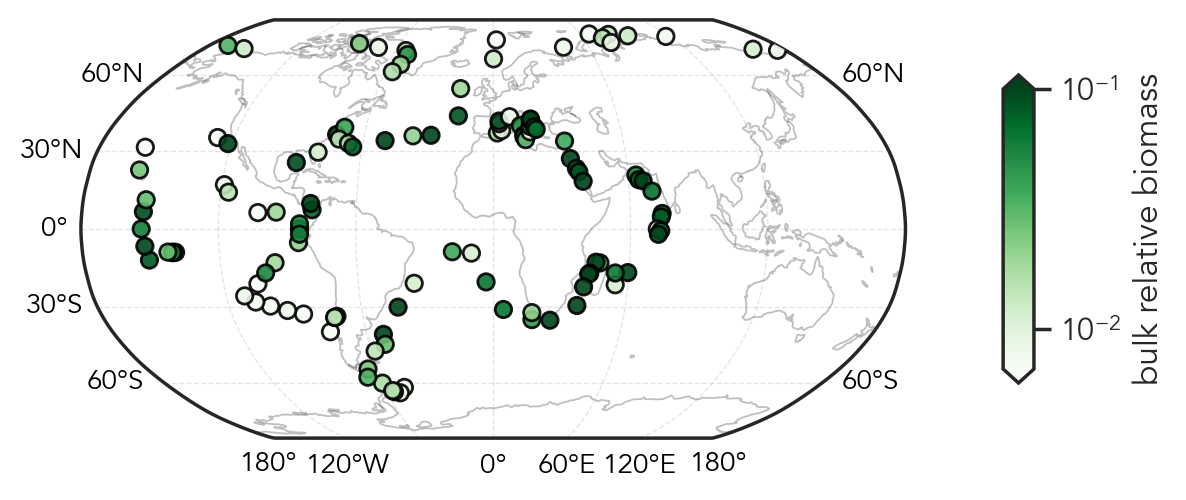

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, figsize=(7,4))
ax.set_global()
#ax.stock_img()
ax.coastlines(alpha=0.25,lw=0.65)

# change font size of the grid labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.2, linestyle='--', zorder=0,  xlabel_style={'size': 10, 'color': 'black'}, ylabel_style={'size': 10, 'color': 'black'})
# remove grid labels on top and right
gl.top_labels = False
gl.right_labels = False

column = "relative_biomass_bulk"
cmap = "Greens"
#cmap = cmocean.cm.balance
vmin, vmax = 1e-3, 1e-1
cbar = SRF_gdf.plot(column=column, cmap=cmap, transform = ccrs.Geodetic(), ax=ax, zorder=10, vmin=vmin, vmax=vmax,
 norm = SymLogNorm(vmin=vmin, vmax=vmax, linthresh=5*1e-2),
 legend=True, alpha=0.9, lw=1, edgecolors='black', s=35,
                 legend_kwds={'shrink': 0.5, 'pad':0.09, #'ticks':ticks,# 'set_yticklabels':ticks_labels,
                      'orientation': 'vertical', 
                      'extend':'both', "fmt": "{:1.0e}",
                      'label': r'bulk relative biomass', 'aspect': 10})

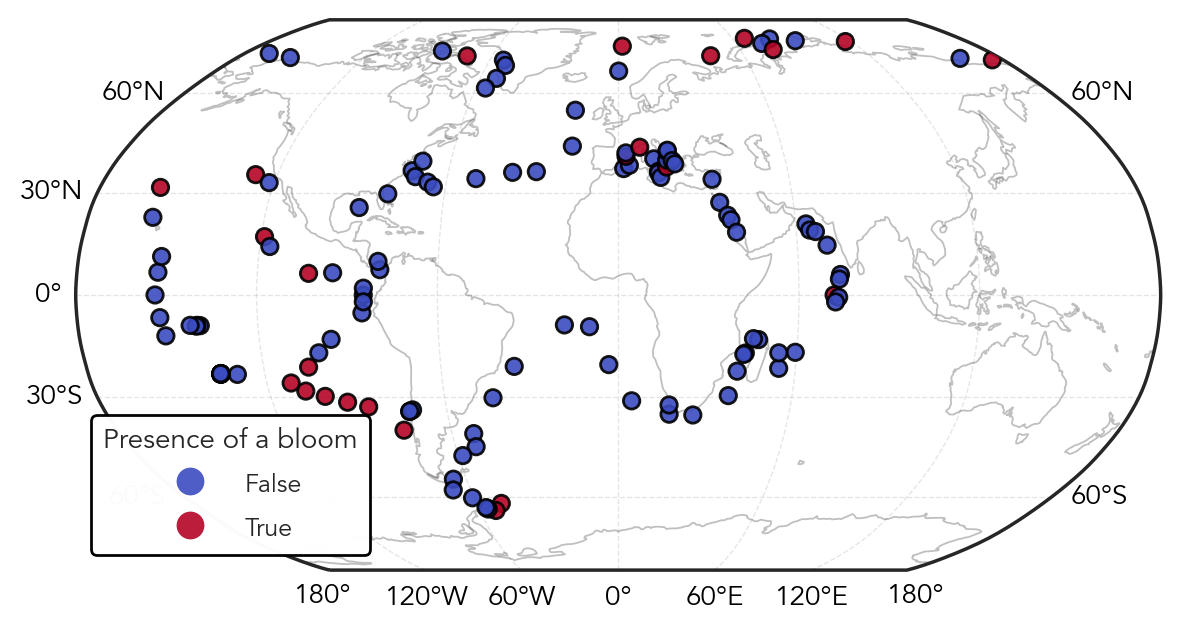

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, figsize=(7,4))
ax.set_global()
#ax.stock_img()
ax.coastlines(alpha=0.25,lw=0.65)

# change font size of the grid labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.2, linestyle='--', zorder=0,  xlabel_style={'size': 10, 'color': 'black'}, ylabel_style={'size': 10, 'color': 'black'})
# remove grid labels on top and right
gl.top_labels = False
gl.right_labels = False



column = "bloom"

SRF_gdf.plot(column=column, ax=ax, transform = ccrs.Geodetic(), zorder=10, cmap='coolwarm', legend=True, alpha=0.9, lw=1, edgecolors='black', s=35)

legend = ax.get_legend()
legend.set_title('Presence of a bloom', prop={'size': 10})
# set transparency
legend.get_frame().set_alpha(0.99)
legend.get_frame().set_edgecolor('black')

# If you want to change the font size of the labels as well
for label in legend.get_texts():
    label.set_fontsize(9)

In [ ]:
import matplotlib.patches as patches

slope species-poor all: 0.227249745389581
slope nan
slope intermediate all: 0.3323956720695312
slope 0.5151576936349678
slope species-rich,
hyperdominated all: 0.33025490706829824
slope 0.5512236147346592


/opt/anaconda3/envs/SLgenesENV/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/SLgenesENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/opt/anaconda3/envs/SLgenesENV/lib/python3.11/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/anaconda3/envs/SLgenesENV/lib/python3.11/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


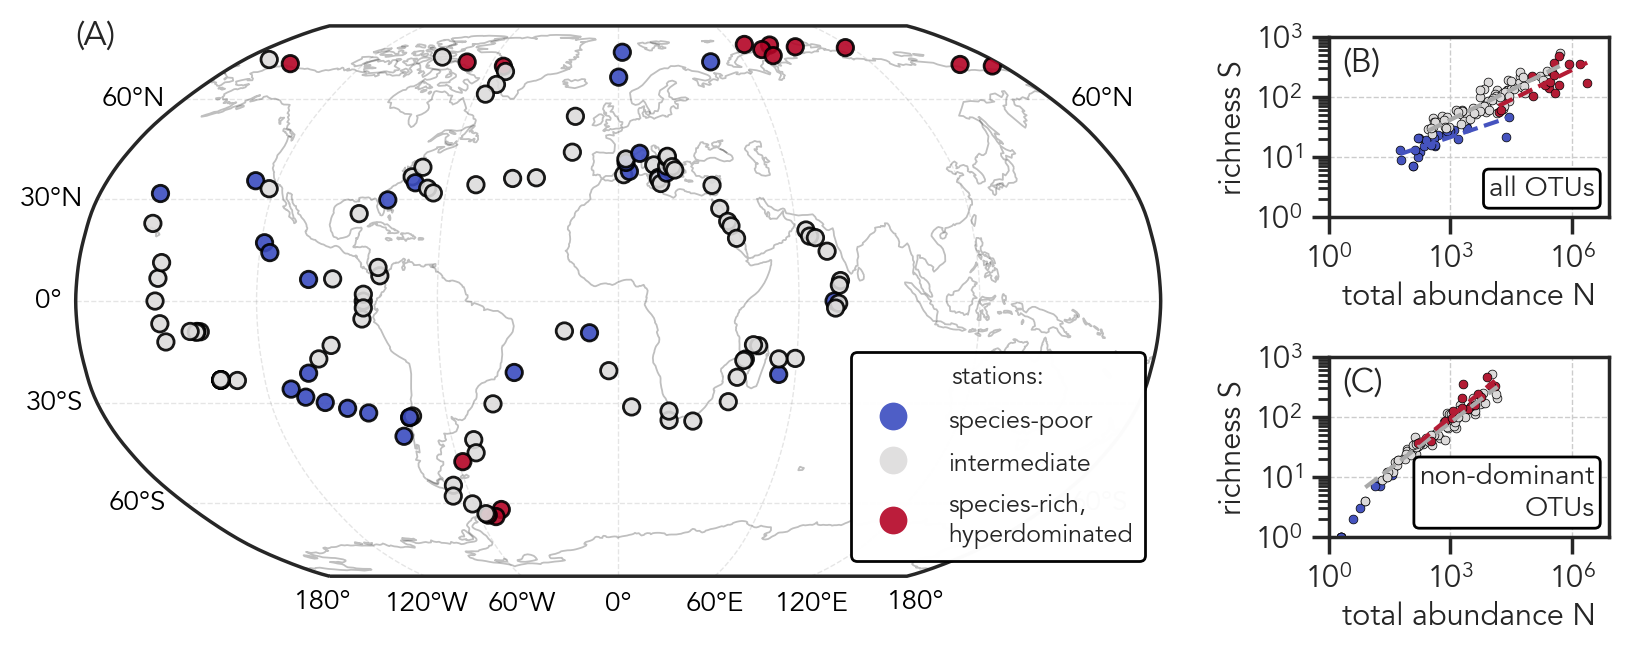

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()}, figsize=(7,4))

ax.set_global()
#ax.stock_img()
ax.coastlines(alpha=0.25,lw=0.65)

# Add gridlines with labels
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5,
    color='gray', alpha=0.2, linestyle='--', zorder=0,
    xlabel_style={'size': 10, 'color': 'black'},
    ylabel_style={'size': 10, 'color': 'black'}
)
gl.top_labels = False
gl.right_labels = False

# Sort by latitude and plot geospatial data
column = "classes"
SRF_gdf.sort_values(by='station', inplace=True)

desired_order = ['species-poor', 'intermediate', 'species-rich,\nhyperdominated']

# Reorder the column in SRF_gdf
SRF_gdf[column] = pd.Categorical(SRF_gdf[column], categories=desired_order, ordered=True)


# Plot with the reordered categories
SRF_gdf.plot(
    column=column, ax=ax, transform=ccrs.Geodetic(), zorder=10,
    cmap='coolwarm', legend=True, alpha=0.9, lw=1,
    edgecolor='black', s=35
)

# Get the legend object and update its properties
legend = ax.get_legend()
if legend is not None:
    legend.set_title('stations:', prop={'size': 9})
    legend.get_frame().set_alpha(0.99)
    legend.get_frame().set_edgecolor('black')
    for label in legend.get_texts():
        label.set_fontsize(9)
        
# get colors from the cmap used with 3 values
colors = sns.color_palette('coolwarm', 3)   
        
ax.text(0.0, 0.95, '(A)', fontsize=12, ha='left', va='bottom', transform=ax.transAxes)

# Create a white rectangle
rect = patches.Rectangle(
    (1, 1),  # Bottom-left corner (x, y)
    5,       # Width
    4,       # Height
    edgecolor='black',  # Border color
    facecolor='white',  # Fill color
    transform=ax.transAxes,  # Coordinate system   
    linewidth=2         # Border thickness
)

# Add the rectangle to the plot
ax.add_patch(rect)
        
ax3 = fig.add_axes([1.02, 0.2, 0.2, 0.225])
ax2 = fig.add_axes([1.02, 0.6, 0.2, 0.225])

for ax in [ax2, ax3]:
    ax.set_ylabel('richness S', fontsize=fontsize-1, labelpad=2)
    ax.set_xlabel('total abundance N', fontsize=fontsize-1, labelpad=2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=-1)
    ax.set_xlim(1e0, 8e6)
    ax.set_ylim(1e0, 1e3)
    

rgb_colors = [(69, 83, 191), (220, 218, 218), (179, 27, 52)]
colors = ['#{:02x}{:02x}{:02x}'.format(*rgb_color) for rgb_color in rgb_colors]

for classe, color, rgb_color in zip(desired_order, colors, rgb_colors):
    ax = ax2
    linecolor = color
    data = SRF_gdf.loc[SRF_gdf['classes']==classe]
    sns.scatterplot(x='biomass_total', y='richness_total', data=data, ax=ax, color=color, s=10, edgecolor='black', lw=1)
    # power-law fit for the total
    logx, logy = np.log10(data['biomass_total']), np.log10(data['richness_total'])
    logx, logy = logx[~np.isnan(logy)], logy[~np.isnan(logy)]
    slope, intercept, r_value, p_value, std_err = linregress(logx, logy)
    x = np.logspace(np.min(logx), np.max(logx), 100)
    y = 10**(intercept)*x**slope
    if rgb_color == (220, 218, 218):
        linecolor = 'darkgrey'
    sns.lineplot(x=x, y=y, ax=ax, color=linecolor, linestyle='--', linewidth=1.5)
    label = '{}: {:.2f}'.format(classe, slope)
    #ax.text(0.5, 0.95, label, fontsize=fontsize-1, ha='center', va='top', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    print(f"slope {classe} all: {slope}")
    
    ax = ax3
    data = SRF_gdf.loc[SRF_gdf['classes']==classe]
    sns.scatterplot(x='biomass_bulk', y='richness_bulk', data=data, ax=ax, color=color, s=10, edgecolor='black', lw=1)
    # power-law fit for the total
    try:
        logx, logy = np.log10(data['biomass_bulk']), np.log10(data['richness_bulk'])
        logx, logy = logx[~np.isnan(logy)], logy[~np.isnan(logy)]
        slope, intercept, r_value, p_value, std_err = linregress(logx, logy)
        x = np.logspace(np.min(logx), np.max(logx), 100)
        y = 10**(intercept)*x**slope
        print('slope', slope)
        sns.lineplot(x=x, y=y, ax=ax, color=linecolor, linestyle='--', linewidth=1.5)
    except:
        pass

ax2.text(0.95, 0.08, 'all OTUs', fontsize=fontsize-2, ha='right', va='bottom', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
ax3.text(0.95, 0.08, 'non-dominant\nOTUs', fontsize=fontsize-2, ha='right', va='bottom', transform=ax3.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
ax2.text(0.05, 0.95, '(B)', fontsize=12, ha='left', va='top', transform=ax2.transAxes)
ax3.text(0.05, 0.95, '(C)', fontsize=12, ha='left', va='top', transform=ax3.transAxes)


        
plt.show()
figname = 'Hyperdominated_Heaps.png'
fig.savefig(supfig_dir+figname, bbox_inches='tight', dpi=300)

In [ ]:
SRF_gdf.set_index('station', inplace=False).loc[173]

latitude                                        78.9564
longitude                                       79.4201
depth_category                                      SRF
depth_nominal                                         5
month                                                 7
SSD                                              1440.0
temp_woa                                        1.11849
sal_woa                                       33.406387
no3_woa                                        0.057944
po4_woa                                        0.431419
sioh4_woa                                      1.378522
dco                                             169.737
dcu                                               0.937
dfe                                               2.913
dzn                                               1.273
geometry                        POINT (79.4201 78.9564)
biomass_bloom                                  307382.0
biomass_bulk                                    

### Heaps Law

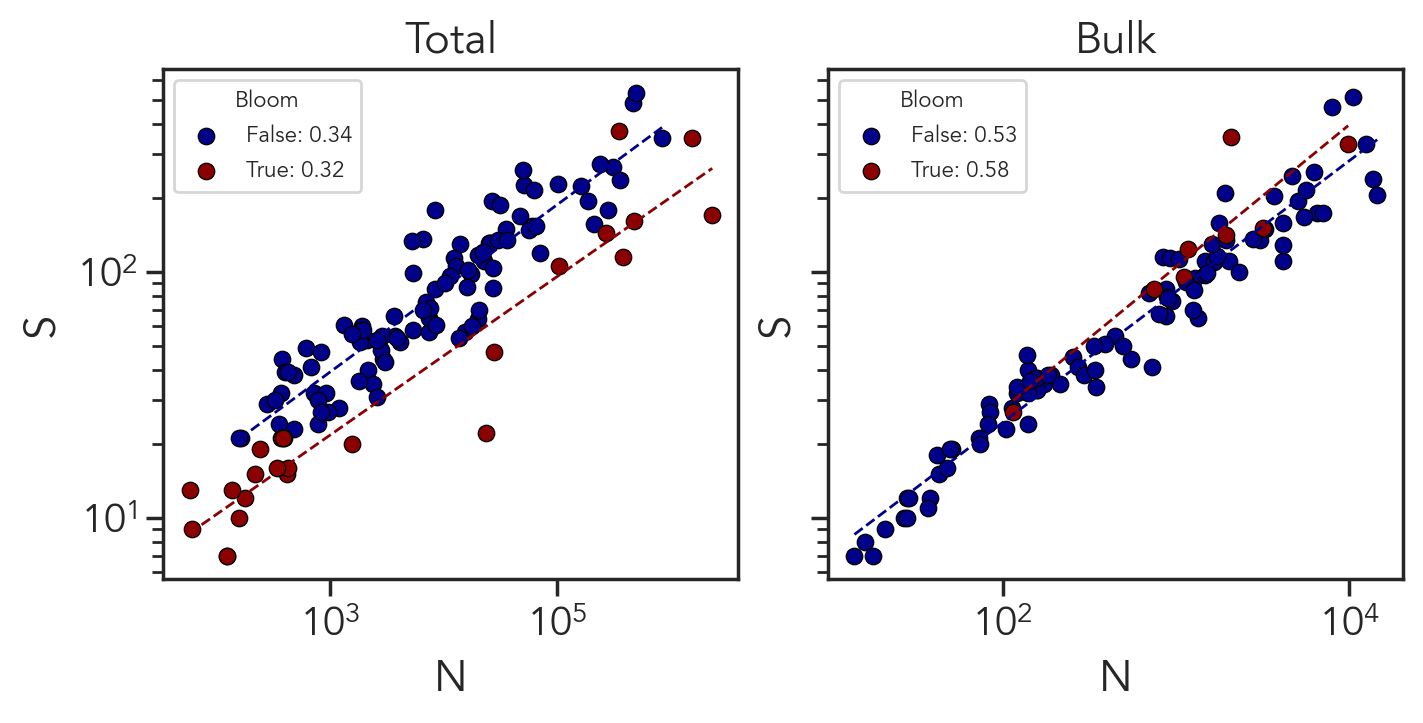

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(7,3.5), sharey=True, sharex=False, constrained_layout=True)
for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('N')
    ax.set_ylabel('S')

# All
ax = axes[0]
ax.set_title('Total')
data = SRF_gdf.loc[SRF_gdf['bloom']==False]
color = 'DarkBlue'
# power-law fit for the total
logx, logy = np.log10(data['biomass_total']), np.log10(data['richness_total'])
logx, logy = logx[~np.isnan(logy)], logy[~np.isnan(logy)]
slope, intercept, r_value, p_value, std_err = linregress(logx, logy)
x = np.logspace(np.min(logx), np.max(logx), 100)
y = 10**(intercept)*x**slope
sns.lineplot(x=x, y=y, ax=ax, color=color, linestyle='--', linewidth=1)
label = 'False: {:.2f}'.format(slope)
sns.scatterplot(x='biomass_total', y='richness_total', data=data, ax=ax, color=color, s=35, edgecolor='black', lw=1, label=label)

data = SRF_gdf.loc[SRF_gdf['bloom']==True]
color = 'DarkRed'
# power-law fit for the total
logx, logy = np.log10(data['biomass_total']), np.log10(data['richness_total'])
logx, logy = logx[~np.isnan(logy)], logy[~np.isnan(logy)]
slope, intercept, r_value, p_value, std_err = linregress(logx, logy)
x = np.logspace(np.min(logx), np.max(logx), 100)
y = 10**(intercept)*x**slope
sns.lineplot(x=x, y=y, ax=ax, color=color, linestyle='--', linewidth=1)
label = 'True: {:.2f}'.format(slope)
sns.scatterplot(x='biomass_total', y='richness_total', data=data, ax=ax, color=color, s=35, edgecolor='black', lw=1, label=label)

ax.legend(fontsize=8, title='Bloom', title_fontsize=8)

# Bulk
ax = axes[1]
ax.set_title('Bulk')
data = SRF_gdf.loc[SRF_gdf['bloom']==False]
data = data[data['biomass_bulk']>10]
color = 'DarkBlue'
logx, logy = np.log10(data['biomass_bulk']), np.log10(data['richness_bulk'])
logx, logy = logx[~np.isnan(logy)], logy[~np.isnan(logy)]
slope, intercept, r_value, p_value, std_err = linregress(logx, logy)
x = np.logspace(np.min(logx), np.max(logx), 100)
y = 10**(intercept)*x**slope
sns.lineplot(x=x, y=y, ax=ax, color=color, linestyle='--', linewidth=1)
label = 'False: {:.2f}'.format(slope)
sns.scatterplot(x='biomass_bulk', y='richness_bulk', data=data, ax=ax, color=color, s=35, edgecolor='black', lw=1, label=label)

data = SRF_gdf.loc[SRF_gdf['bloom']==True]
color = 'DarkRed'
# select data where biomass_bulk is not nan and > 0
data = data[data['biomass_bulk']>10]
logx, logy = np.log10(data['biomass_bulk']), np.log10(data['richness_bulk'])
logx, logy = logx[~np.isnan(logy)], logy[~np.isnan(logy)]
slope, intercept, r_value, p_value, std_err = linregress(logx, logy)
x = np.logspace(np.min(logx), np.max(logx), 100)
y = 10**(intercept)*x**slope
#print(x, y, logx, logy)
sns.lineplot(x=x, y=y, ax=ax, color=color, linestyle='--', linewidth=1)
label = 'True: {:.2f}'.format(slope)
sns.scatterplot(x='biomass_bulk', y='richness_bulk', data=data, ax=ax, color=color, s=35, edgecolor='black', lw=1, label=label)






ax.legend(fontsize=8, title='Bloom', title_fontsize=8)


## metacommunity index

In [ ]:
SRF_gdf['K_total'] = SRF_gdf['richness_total']/SRF_gdf['biomass_total']**0.5
SRF_gdf['K_bulk'] = SRF_gdf['richness_bulk']/SRF_gdf['biomass_bulk']**0.5

DCM_gdf['K_total'] = DCM_gdf['richness_total']/DCM_gdf['biomass_total']**0.5
DCM_gdf['K_bulk'] = DCM_gdf['richness_bulk']/DCM_gdf['biomass_bulk']**0.5

In [ ]:
# print mean, std and cv of K
print('SRF')
print('K_total: mean {:.2f} std {:.2f} cv {:.2f}'.format(SRF_gdf['K_total'].mean(), SRF_gdf['K_total'].std(), SRF_gdf['K_total'].std()/SRF_gdf['K_total'].mean()))
print('K_bulk: mean {:.2f} std {:.2f} cv {:.2f}'.format(SRF_gdf['K_bulk'].mean(), SRF_gdf['K_bulk'].std(), SRF_gdf['K_bulk'].std()/SRF_gdf['K_bulk'].mean()))

# print mean, std and cv of K for bloom and non-bloom stations
print('SRF')
print('K_total')
print('Bloom: mean {:.2f} std {:.2f} cv {:.2f}'.format(SRF_gdf.loc[SRF_gdf['bloom']==True,'K_total'].mean(), SRF_gdf.loc[SRF_gdf['bloom']==True,'K_total'].std(), SRF_gdf.loc[SRF_gdf['bloom']==True,'K_total'].std()/SRF_gdf.loc[SRF_gdf['bloom']==True,'K_total'].mean()))
print('Non-bloom: mean {:.2f} std {:.2f} cv {:.2f}'.format(SRF_gdf.loc[SRF_gdf['bloom']==False,'K_total'].mean(), SRF_gdf.loc[SRF_gdf['bloom']==False,'K_total'].std(), SRF_gdf.loc[SRF_gdf['bloom']==False,'K_total'].std()/SRF_gdf.loc[SRF_gdf['bloom']==False,'K_total'].mean()))

print('K_bulk')
print('Bloom: mean {:.2f} std {:.2f} cv {:.2f}'.format(SRF_gdf.loc[SRF_gdf['bloom']==True,'K_bulk'].mean(), SRF_gdf.loc[SRF_gdf['bloom']==True,'K_bulk'].std(), SRF_gdf.loc[SRF_gdf['bloom']==True,'K_bulk'].std()/SRF_gdf.loc[SRF_gdf['bloom']==True,'K_bulk'].mean()))
print('Non-bloom: mean {:.2f} std {:.2f} cv {:.2f}'.format(SRF_gdf.loc[SRF_gdf['bloom']==False,'K_bulk'].mean(), SRF_gdf.loc[SRF_gdf['bloom']==False,'K_bulk'].std(), SRF_gdf.loc[SRF_gdf['bloom']==False,'K_bulk'].std()/SRF_gdf.loc[SRF_gdf['bloom']==False,'K_bulk'].mean()))

### DCM

print('DCM')
print('K_total: mean {:.2f} std {:.2f} cv {:.2f}'.format(DCM_gdf['K_total'].mean(), DCM_gdf['K_total'].std(), DCM_gdf['K_total'].std()/DCM_gdf['K_total'].mean()))
print('K_bulk: mean {:.2f} std {:.2f} cv {:.2f}'.format(DCM_gdf['K_bulk'].mean(), DCM_gdf['K_bulk'].std(), DCM_gdf['K_bulk'].std()/DCM_gdf['K_bulk'].mean()))

# print mean, std and cv of K for bloom and non-bloom stations
print('DCM')
print('K_total')
print('Bloom: mean {:.2f} std {:.2f} cv {:.2f}'.format(DCM_gdf.loc[DCM_gdf['bloom']==True,'K_total'].mean(), DCM_gdf.loc[DCM_gdf['bloom']==True,'K_total'].std(), DCM_gdf.loc[DCM_gdf['bloom']==True,'K_total'].std()/DCM_gdf.loc[DCM_gdf['bloom']==True,'K_total'].mean()))
print('Non-bloom: mean {:.2f} std {:.2f} cv {:.2f}'.format(DCM_gdf.loc[DCM_gdf['bloom']==False,'K_total'].mean(), DCM_gdf.loc[DCM_gdf['bloom']==False,'K_total'].std(), DCM_gdf.loc[DCM_gdf['bloom']==False,'K_total'].std()/DCM_gdf.loc[DCM_gdf['bloom']==False,'K_total'].mean()))

print('K_bulk')
print('Bloom: mean {:.2f} std {:.2f} cv {:.2f}'.format(DCM_gdf.loc[DCM_gdf['bloom']==True,'K_bulk'].mean(), DCM_gdf.loc[DCM_gdf['bloom']==True,'K_bulk'].std(), DCM_gdf.loc[DCM_gdf['bloom']==True,'K_bulk'].std()/DCM_gdf.loc[DCM_gdf['bloom']==True,'K_bulk'].mean()))
print('Non-bloom: mean {:.2f} std {:.2f} cv {:.2f}'.format(DCM_gdf.loc[DCM_gdf['bloom']==False,'K_bulk'].mean(), DCM_gdf.loc[DCM_gdf['bloom']==False,'K_bulk'].std(), DCM_gdf.loc[DCM_gdf['bloom']==False,'K_bulk'].std()/DCM_gdf.loc[DCM_gdf['bloom']==False,'K_bulk'].mean()))


SRF
K_total: mean 0.92 std 0.44 cv 0.48
K_bulk: mean 2.57 std 0.94 cv 0.37
SRF
K_total
Bloom: mean 0.71 std 0.41 cv 0.58
Non-bloom: mean 0.98 std 0.43 cv 0.44
K_bulk
Bloom: mean 2.68 std 1.95 cv 0.73
Non-bloom: mean 2.56 std 0.75 cv 0.29
DCM
K_total: mean nan std nan cv nan
K_bulk: mean nan std nan cv nan
DCM
K_total
Bloom: mean nan std nan cv nan
Non-bloom: mean nan std nan cv nan
K_bulk
Bloom: mean nan std nan cv nan
Non-bloom: mean nan std nan cv nan


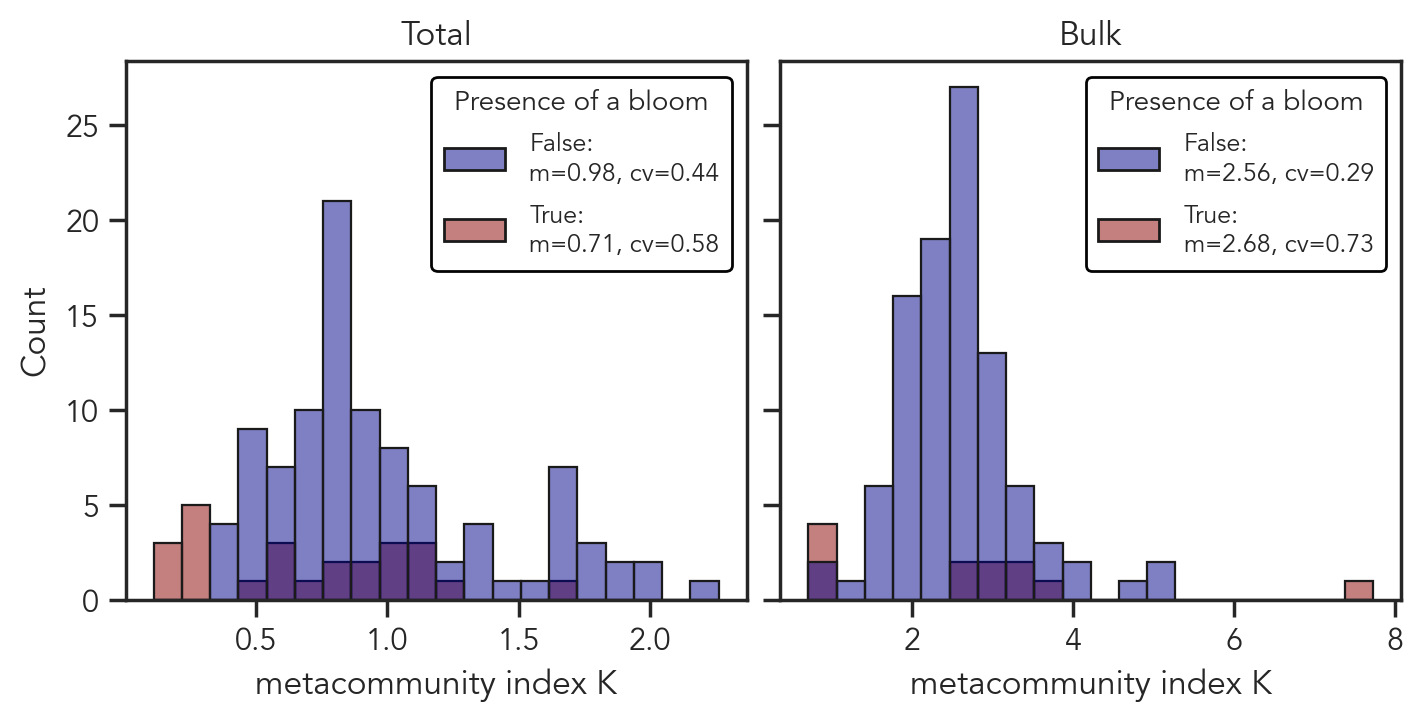

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(7,3.5), sharey=True, sharex=False, constrained_layout=True)

# custom palette with DarkRed for bloom and DarkBlue for no bloom
palette = sns.color_palette(['DarkBlue', 'DarkRed'])

ax = axes[0]
sns.histplot(x='K_total', data=SRF_gdf, ax=ax, hue='bloom', bins=20, edgecolor='k',  kde=False, stat='count', palette=palette, legend=True)
legend = ax.get_legend()
for i, text in enumerate(legend.get_texts()):
    if i == 0:
        text.set_text('False:\nm={:.2f}, cv={:.2f}'.format(SRF_gdf.loc[SRF_gdf['bloom']==False,'K_total'].mean(), SRF_gdf.loc[SRF_gdf['bloom']==False,'K_total'].std()/SRF_gdf.loc[SRF_gdf['bloom']==False,'K_total'].mean()))
    else:
        text.set_text('True:\nm={:.2f}, cv={:.2f}'.format(SRF_gdf.loc[SRF_gdf['bloom']==True,'K_total'].mean(), SRF_gdf.loc[SRF_gdf['bloom']==True,'K_total'].std()/SRF_gdf.loc[SRF_gdf['bloom']==True,'K_total'].mean()))
ax.set_xlabel('metacommunity index K')
ax.set_title('Total')

ax = axes[1]
sns.histplot(x='K_bulk', data=SRF_gdf, ax=ax, hue='bloom', bins=20, edgecolor='k', kde=False, stat='count', palette=palette)
legend = ax.get_legend()
for i, text in enumerate(legend.get_texts()):
    if i == 0:
        text.set_text('False:\nm={:.2f}, cv={:.2f}'.format(SRF_gdf.loc[SRF_gdf['bloom']==False,'K_bulk'].mean(), SRF_gdf.loc[SRF_gdf['bloom']==False,'K_bulk'].std()/SRF_gdf.loc[SRF_gdf['bloom']==False,'K_bulk'].mean()))
    else:
        text.set_text('True:\nm={:.2f}, cv={:.2f}'.format(SRF_gdf.loc[SRF_gdf['bloom']==True,'K_bulk'].mean(), SRF_gdf.loc[SRF_gdf['bloom']==True,'K_bulk'].std()/SRF_gdf.loc[SRF_gdf['bloom']==True,'K_bulk'].mean()))
ax.set_xlabel('metacommunity index K')
ax.set_title('Bulk')

for ax in axes:
    legend = ax.get_legend()
    legend.set_title('Presence of a bloom', prop={'size': 10})
    # set fontsize
    for label in legend.get_texts():
        label.set_fontsize(9)
    # change the legend to add the mean and the cv of K for bloom and non-bloom stations
    legend.get_frame().set_alpha(0.99)
    legend.get_frame().set_edgecolor('black')

# S = K N**0.5


In [ ]:
# build a distance dataframe using the K index
# use the K index for the bulk
d_total = pd.DataFrame(index=SRF_gdf['station'], columns=SRF_gdf['station'])
d_bulk = pd.DataFrame(index=SRF_gdf['station'], columns=SRF_gdf['station'])

d_log_total = pd.DataFrame(index=SRF_gdf['station'], columns=SRF_gdf['station'])
d_log_bulk = pd.DataFrame(index=SRF_gdf['station'], columns=SRF_gdf['station'])

for i, row in SRF_gdf.iterrows():
    for j, row2 in SRF_gdf.iterrows():
        d_total.loc[row['station'], row2['station']] = (row['K_total']-row2['K_total'])**2
        d_bulk.loc[row['station'], row2['station']] = (row['K_bulk']-row2['K_bulk'])**2
        d_log_total.loc[row['station'], row2['station']] = np.abs((np.log10(row['K_total'])-np.log10(row2['K_total'])))
        d_log_bulk.loc[row['station'], row2['station']] = np.abs((np.log10(row['K_bulk'])-np.log10(row2['K_bulk'])))

# remove nan columns and nan rows
d_total = d_total.dropna(axis=0, how='all')
d_total = d_total.dropna(axis=1, how='all').apply(pd.to_numeric, errors='coerce')
d_bulk = d_bulk.dropna(axis=0, how='all')
d_bulk = d_bulk.dropna(axis=1, how='all').apply(pd.to_numeric, errors='coerce')
d_log_total = d_log_total.dropna(axis=0, how='all')
d_log_total = d_log_total.dropna(axis=1, how='all').apply(pd.to_numeric, errors='coerce')
d_log_bulk = d_log_bulk.dropna(axis=0, how='all')
d_log_bulk = d_log_bulk.dropna(axis=1, how='all').apply(pd.to_numeric, errors='coerce')

# sort index and column by bloom status and  by number
sorted_index = SRF_gdf.sort_values(by=['station','bloom'], ascending=False)['station']
# last station with bloom = True
blooms_stations = len(SRF_gdf[SRF_gdf['bloom']==True])
# remove index that are not present in the distance matrix
sorted_index = sorted_index[sorted_index.isin(d_bulk.index)]
print(sorted_index)
d_total = d_total.loc[sorted_index, sorted_index]
d_bulk = d_bulk.loc[sorted_index, sorted_index]
d_log_total = d_log_total.loc[sorted_index, sorted_index]
d_log_bulk = d_log_bulk.loc[sorted_index, sorted_index]



133    210
132    209
131    208
130    206
129    205
      ... 
5       14
4       12
3       11
1        8
0        7
Name: station, Length: 110, dtype: int64


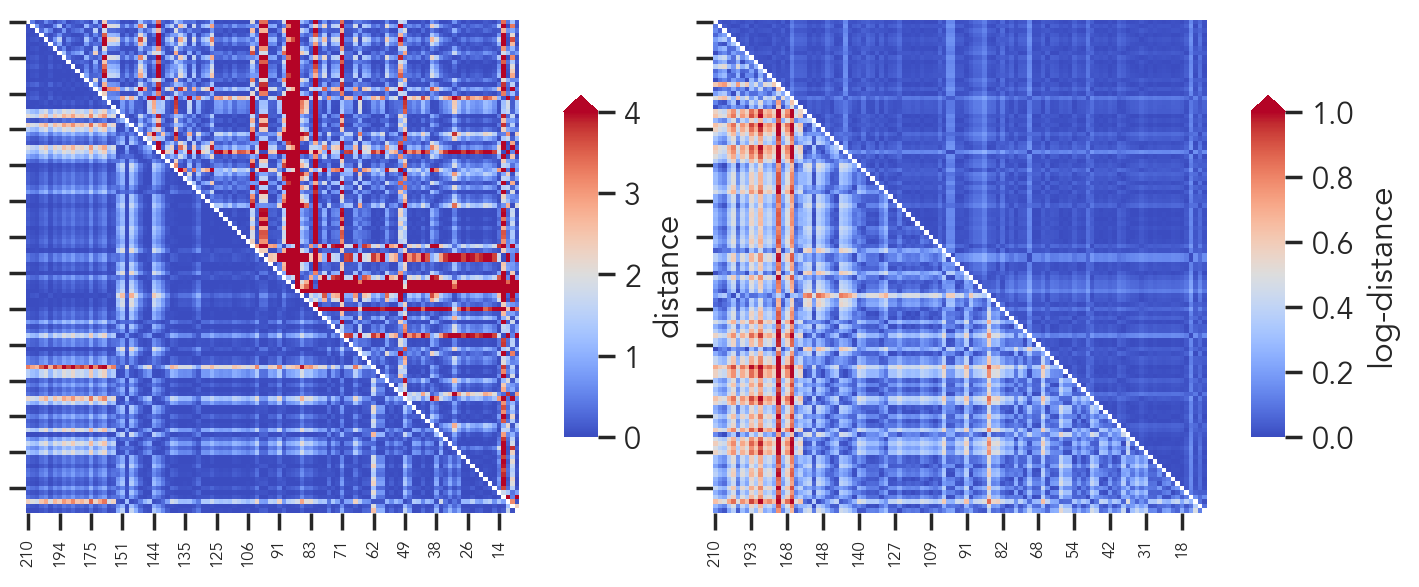

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(7,3.5), sharey=True, sharex=False, constrained_layout=True)

ax = axes[0]
mask = np.triu(np.ones_like(d_total, dtype=bool))
sns.heatmap(d_total, ax=ax, cmap='coolwarm', mask=mask, cbar_kws={'shrink': 0.5, 'pad':0.09, #'ticks':ticks,# 'set_yticklabels':ticks_labels,
                      'orientation': 'vertical', 
                      'extend':'max',
                      'label': r'distance', 'aspect': 10}, square=True,
            vmin=0, vmax=4)
# reduce size of the labels



mask = np.tril(np.ones_like(d_bulk, dtype=bool))
sns.heatmap(d_bulk, ax=ax, cmap='coolwarm', mask=mask, square=True,
            vmin=0, vmax=4, cbar=False)

ax = axes[1]
mask = np.triu(np.ones_like(d_log_total, dtype=bool))
sns.heatmap(d_log_total, ax=ax, cmap='coolwarm', mask=mask, 
            cbar_kws={'shrink': 0.5, 'pad':0.09, #'ticks':ticks,# 'set_yticklabels':ticks_labels,
                      'orientation': 'vertical', 
                      'extend':'max',
                      'label': r'log-distance', 'aspect': 10},
            square=True,
            vmin=0, vmax=1)

mask = np.tril(np.ones_like(d_log_bulk, dtype=bool))
sns.heatmap(d_log_bulk, ax=ax, cmap='coolwarm', mask=mask, square=True,
            vmin=0, vmax=4, cbar=False)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)
    ax.set_xlabel('')
    ax.set_ylabel('')

In [ ]:
import numpy as np
from scipy.special import zeta

class Zipf:
    def __init__(self, alpha):
        self.alpha = alpha

# Helper function for generalized harmonic numbers
def harmonic(n, alpha):
    return sum(1 / (k ** alpha) for k in range(1, n + 1))

# Calculate the normalization constant (Riemann zeta function)
def normalization_constant(zipf):
    return zeta(zipf.alpha + 1)

# PDF of the Zipf distribution
def pdf(zipf, x):
    if x < 1:
        return 0.0
    zeta_val = normalization_constant(zipf)
    return x ** (-zipf.alpha - 1) / zeta_val

# CDF of the Zipf distribution
def cdf(zipf, x):
    if x < 1:
        return 0.0
    zeta_val = normalization_constant(zipf)
    H_x = harmonic(x, zipf.alpha + 1)
    return H_x / zeta_val

# Random sampling from the Zipf distribution
def zipfrand(zipf, max_val=10000):
    if zipf.alpha >= 1:
        u = np.random.rand()
        x = 1
        while cdf(zipf, x) < u:
            x += 1
        return x
    else:
        u = np.random.rand()
        left, right = 1, 2
        
        # Expand interval until one endpoint is below and the other is above `u`
        while cdf(zipf, right) < u:
            left = right
            right *= 2
            if right > max_val:
                right = max_val + 1
                break

        # Perform binary search within the identified interval
        while left < right:
            mid = int(np.sqrt(left * right))  # Logarithmic step: Geometric mean
            if cdf(zipf, mid) < u:
                left = mid + 1
            else:
                right = mid
        return left

In [ ]:
zipf_dist = Zipf(alpha=0.5)
random_sample = zipfrand(zipf_dist)
print("Random sample from Zipf distribution:", random_sample)

Random sample from Zipf distribution: 1


In [ ]:
S_bulk_empirical = SRF_gdf['richness_bulk'].values
S_bulk_empirical = S_bulk_empirical[S_bulk_empirical>0]
S_bulk_empirical

array([ 37.,   4.,  29.,   1.,  24.,  33.,  45., 111., 109.,  94.,  91.,
        85.,  28.,  27.,  40.,  18.,  79., 134.,   9., 205.,  55.,  32.,
       111., 149.,  21., 158.,   3.,  35.,  12.,  65., 116.,  41.,  24.,
       173., 238., 129.,  44.,  35.,  33.,   1.,  12.,   8.,  38., 111.,
        20., 208.,  66., 204., 124., 353., 466., 515.,  46.,  37.,  23.,
        15.,   1.,   1.,  50., 115.,  76.,  51.,  78.,  67., 194.,  97.,
        50.,  32.,  41., 100.,  38.,  38.,  10.,  34.,  70.,   7., 114.,
       128., 167.,  36.,   1., 113.,  82.,   7.,   4.,  12.,  19.,  16.,
        19.,  10.,  34.,  11.,   2.,  27., 246., 150.,  40.,  85., 330.,
        95., 136., 141., 174., 158., 134., 330., 215.,  84., 255.,  99.])

In [ ]:
### H0
zipf_dist = Zipf(alpha=0.5)
# total 
S_bulk_empirical = SRF_gdf['richness_bulk'].values
S_bulk_empirical = S_bulk_empirical[S_bulk_empirical>0]
N_bulk_synthetic = np.array([
    np.mean([np.sum([zipfrand(Zipf(alpha=0.5), max_val=1*S) for S in range(int(S_bulk_empirical[i]))]) for _ in range(10)])
    for i in range(len(S_bulk_empirical))
])
K_bulk_synthetic = S_bulk_empirical/N_bulk_synthetic**0.5
logK_bulk_synthetic = [np.abs(np.log10(K_bulk_synthetic[i])-np.log10(K_bulk_synthetic[j])) for i in range(len(K_bulk_synthetic)) for j in range(i+1, len(K_bulk_synthetic))]

S_total_empirical = SRF_gdf['richness_total'].values
S_total_empirical = S_total_empirical[S_total_empirical>0]
N_total_synthetic = np.array([
    np.mean([np.sum([zipfrand(Zipf(alpha=0.5), max_val=1*S) for S in range(int(S_total_empirical[i]))]) for _ in range(10)])
    for i in range(len(S_total_empirical))
])
K_total_synthetic = S_total_empirical/N_total_synthetic**0.5
logK_total_synthetic = [np.abs(np.log10(K_total_synthetic[i])-np.log10(K_total_synthetic[j])) for i in range(len(K_total_synthetic)) for j in range(i+1, len(K_total_synthetic))]


25


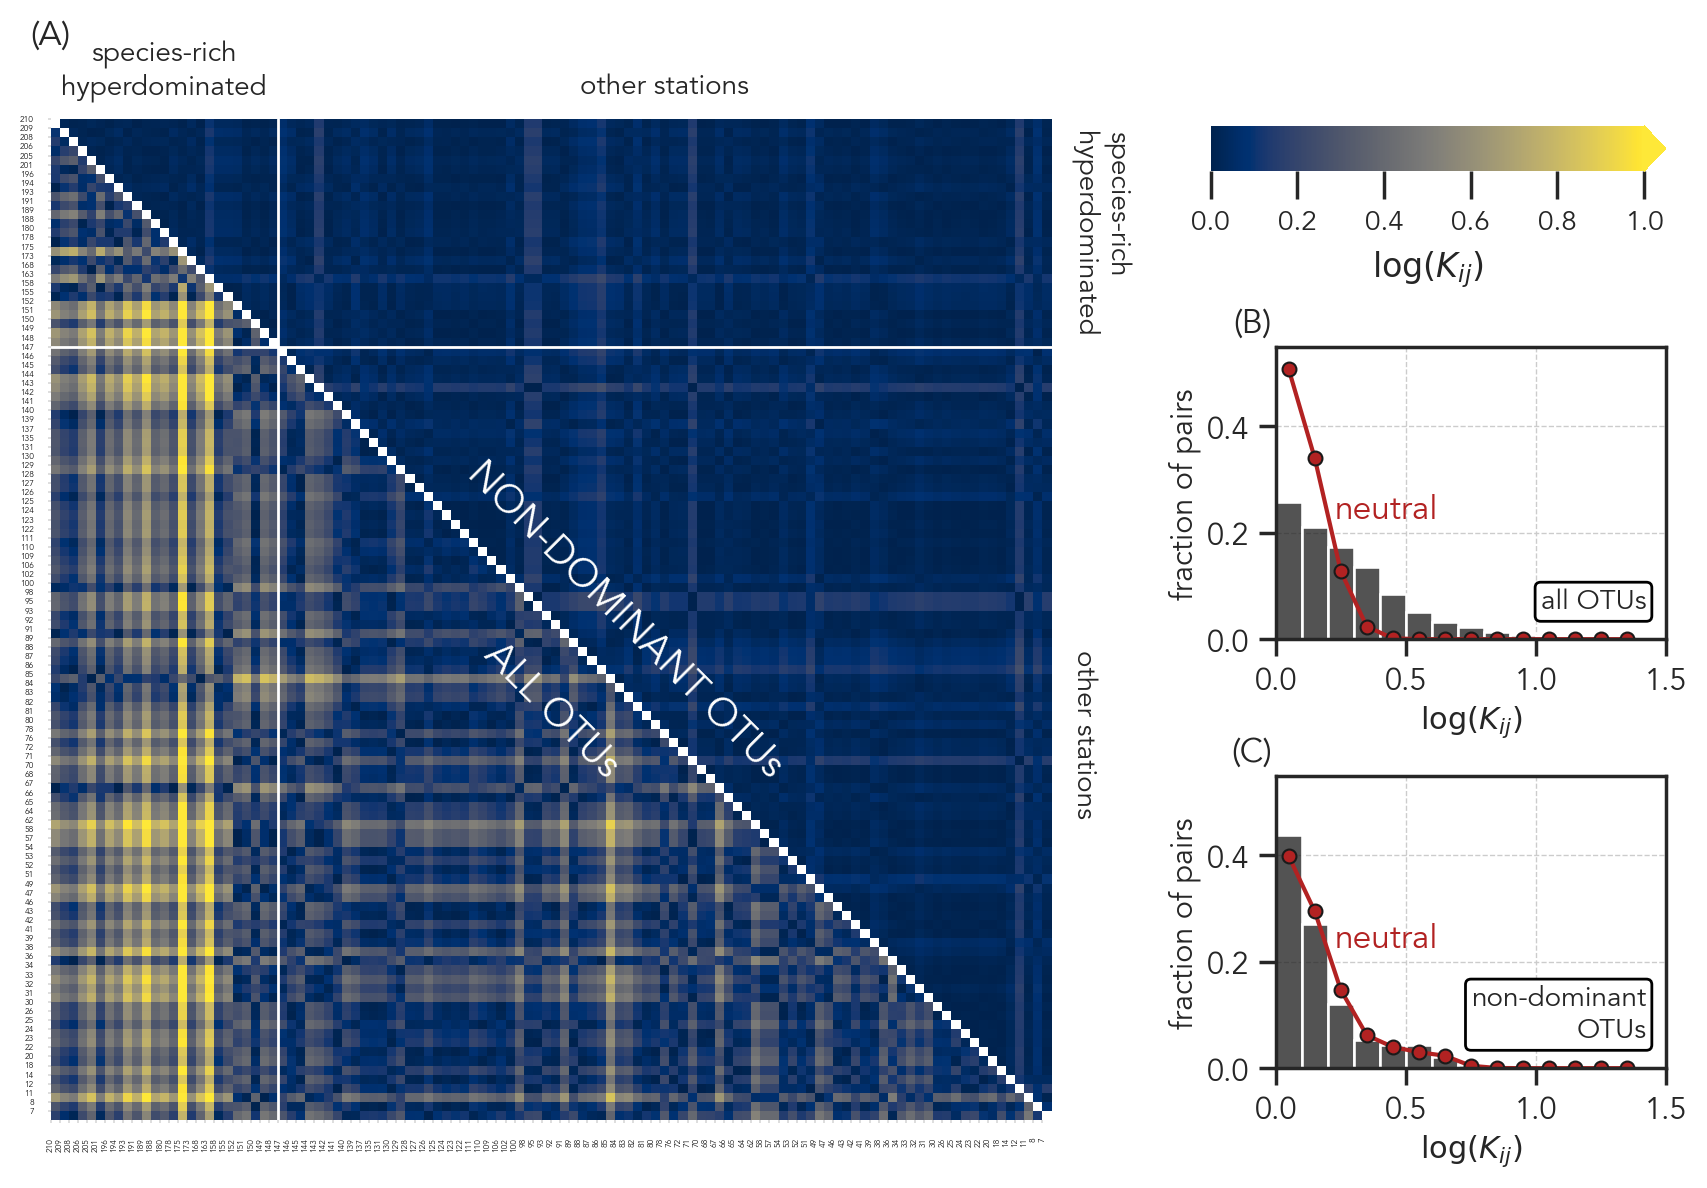

In [ ]:
fig, ax = plt.subplots(figsize=(6.5,6.5))
text = '(A)'
ax.text(0.0, 1.1, text, fontsize=fontsize, ha='center', va='top', transform=ax.transAxes)
cmap = 'cividis'

cbar_ax = fig.add_axes([1.02, 0.84, 0.35, 0.035])
mask = np.triu(np.ones_like(d_log_total, dtype=bool))
sns.heatmap(d_log_total, ax=ax, cmap=cmap, mask=mask, 
            cbar_ax=cbar_ax,
            cbar_kws={'shrink': 0.35, 'pad':0.15, #'ticks':ticks,# 'set_yticklabels':ticks_labels,
                      'orientation': 'horizontal', 
                      'extend':'max',
                      'label': r'$\log(K_{ij})$', 'aspect': 10},
            square=True,
            vmin=0, vmax=1)

mask = np.tril(np.ones_like(d_log_bulk, dtype=bool))
sns.heatmap(d_log_bulk, ax=ax, cmap=cmap, mask=mask, square=True,
            vmin=0, vmax=4, cbar=False)
ax.set_yticks(np.arange(0, len(d_log_total.columns), 1))
ax.set_yticklabels(d_log_total.columns, fontsize=3)
ax.set_xticks(np.arange(0, len(d_log_total.columns), 1))
ax.set_xticklabels(d_log_total.columns, fontsize=3)
ax.set_xlabel('')
ax.set_ylabel('')

ax.tick_params(
    axis='both',        # Apply changes to both x and y axes ('x', 'y', or 'both')
    which='both',       # Apply to both major and minor ticks ('major', 'minor', or 'both')
    direction='out',     # Direction of the ticks ('in', 'out', or 'inout')
    length=1,           # Length of the ticks
    width=0.1,            # Thickness of the ticks
    colors='k',      # Color of the ticks
    labelsize=3,       # Font size of the tick labels
    pad=5               # Distance between ticks and their labels
)


cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10, size=10)
# change the rotation of the labels
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), rotation=0)
# change the rotation of the label

# draw a line to separate the bloom from the non-bloom stations
print(blooms_stations)
ax.axvline(blooms_stations, color='w', linestyle='-', linewidth=1)
ax.axhline(blooms_stations, color='w', linestyle='-', linewidth=1)

# Add annotation for bloom species
ax.text(x=blooms_stations/2, y=-2, s='species-rich\nhyperdominated', ha='center', va='bottom', fontsize=10)
ax.text(x=(len(d_log_total.columns)+blooms_stations)/2, y=-2, s='other stations', ha='center', va='bottom', fontsize=10)

ax.text(y=blooms_stations/2, x=len(d_log_total.columns)+2, s='species-rich\nhyperdominated', ha='left', va='center', fontsize=10, rotation=-90)
ax.text(y=(len(d_log_total.columns)+blooms_stations)/2, x=len(d_log_total.columns)+2, s='other stations', ha='left', va='center', fontsize=10, rotation=-90)


ax.text(len(d_log_total.columns)/2, 10+len(d_log_total.columns)/2, 'ALL OTUs', va='center', ha='center', rotation=-45, fontsize=14, color='w')
ax.text(8+len(d_log_total.columns)/2, len(d_log_total.columns)/2, 'NON-DOMINANT OTUs', va='center', ha='center', rotation=-45, fontsize=14, color='w')

# S = K N**0.5
# K = S N**-0.5
# err(S) \sqrt(S)
# S_1/S_2 = K_1/K_2 (N_1/N_2)**0.5
# log(K_1/K_2)
# d(i,j) = |log(k(i)) - log(k(j))| = d(j,i)

ax3 = fig.add_axes([1.07, 0.15, 0.3, 0.225])
ax2 = fig.add_axes([1.07, 0.48, 0.3, 0.225])
for ax in [ax2, ax3]:
    ax.set_ylabel('fraction of pairs', fontsize=fontsize-1, labelpad=2)
    ax.set_xlabel(r'$\log(K_{ij})$', fontsize=fontsize-1, labelpad=2)
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, zorder=-1)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(0, 0.55)

bins = np.arange(0, 1.5, 0.1)
d_log_total_values = d_log_total.mask(np.triu(np.ones_like(d_log_total, dtype=bool))).values
d_log_total_values = d_log_total_values[~np.isnan(d_log_total_values)]
sns.histplot(d_log_total_values, ax=ax2, bins=bins, kde=False, color='k', stat='probability' ) 
hist, bin_edges = np.histogram(logK_total_synthetic, bins=bins)
x_plot = (bin_edges[:-1] + bin_edges[1:]) / 2
y_plot = hist/np.sum(hist)
sns.lineplot(x=x_plot, y=y_plot, ax=ax2, color='firebrick', linestyle='-', linewidth=1.5, marker='o', markersize=5, markeredgecolor='k')
text = 'neutral'
ax3.text(0.15, 0.5, text, fontsize=12, ha='left', va='top', transform=ax3.transAxes, color='firebrick')

d_log_bulk_values = d_log_bulk.mask(np.triu(np.ones_like(d_log_bulk, dtype=bool))).values
d_log_bulk_values = d_log_bulk_values[~np.isnan(d_log_bulk_values)]
sns.histplot(d_log_bulk_values, ax=ax3, bins=bins, kde=False, color='k', stat='probability' ) 
hist, bin_edges = np.histogram(logK_bulk_synthetic, bins=bins)
x_plot = (bin_edges[:-1] + bin_edges[1:]) / 2
y_plot = hist/np.sum(hist)
sns.lineplot(x=x_plot, y=y_plot, ax=ax3, color='firebrick', linestyle='-', linewidth=1.5, marker='o', markersize=5, markeredgecolor='k')
text = 'neutral'
ax2.text(0.15, 0.5, text, fontsize=12, ha='left', va='top', transform=ax2.transAxes, color='firebrick')


text = '(B)'
ax2.text(-0.01, 1.02, text, fontsize=12, ha='right', va='bottom', transform=ax2.transAxes)

ax2.text(0.95, 0.08, 'all OTUs', fontsize=fontsize-2, ha='right', va='bottom', transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
ax3.text(0.95, 0.08, 'non-dominant\nOTUs', fontsize=fontsize-2, ha='right', va='bottom', transform=ax3.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

text = '(C)'
ax3.text(-0.01, 1.02, text, fontsize=12, ha='right', va='bottom', transform=ax3.transAxes)

figname = 'Hyperdominated_K_log_distance.png'
fig.savefig(supfig_dir+figname, bbox_inches='tight', dpi=300)


<Axes: ylabel='Count'>

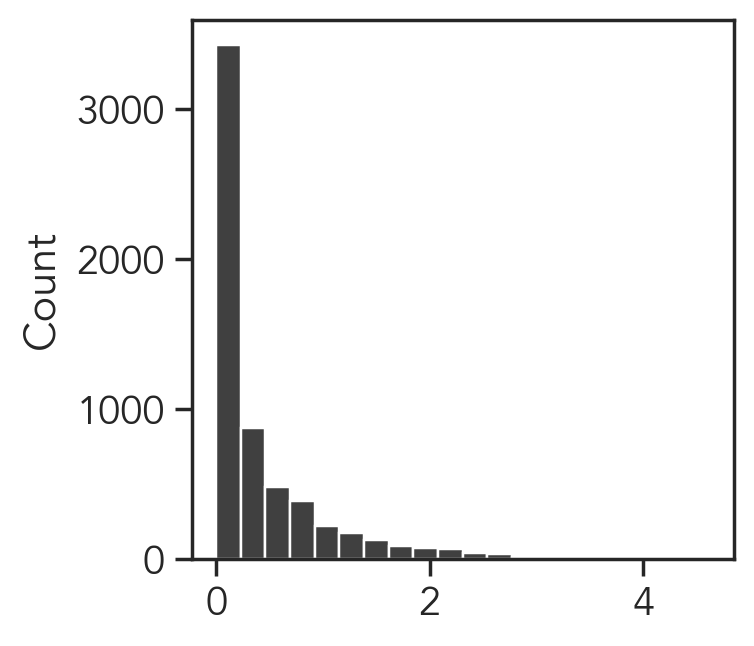

In [ ]:
fig, ax = plt.subplots()

# consider only the lower triangle
mask = np.triu(np.ones_like(d_total, dtype=bool))
# histplot of the distances of the K index in the lower triangle
data = d_total.values[~mask]
sns.histplot(data, bins=20, ax=ax, kde=False, color='black')

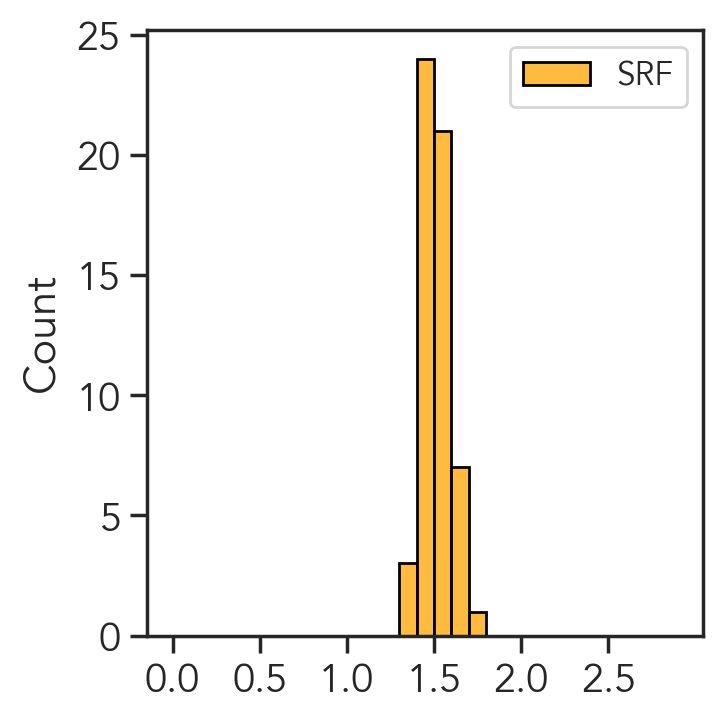

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3.5,3.5), constrained_layout=True)

#histplot of the bulk distribution only for SRF stations
ax.set_xticks(np.arange(0,3,0.5))
rho_bulk_SRF = [v+1 for k, v in rho_bulk.items() if k[-3:] == 'SRF']
sns.histplot(data=rho_bulk_SRF, bins=np.arange(0,3,0.1), color='orange', ax=ax, label='SRF', edgecolor='black', linewidth=1)
ax.legend(fontsize=12)


In [ ]:
#Abundances_SRF is Abundances of only SRF stations
#Abundances_DCM is Abundances of only DCM stations
columns = Abundances.columns
columns_SRF = [c for c in columns if c[-3:] == 'SRF']
columns_DCM = [c for c in columns if c[-3:] == 'DCM']
Abundances_SRF = Abundances[columns_SRF]
Abundances_DCM = Abundances[columns_DCM]
# rename Abundances_SRF stations by removing SRF and converting to integer
Abundances_SRF.columns = [int(c[:-4]) for c in Abundances_SRF.columns]
Abundances_SRF.head()
# sort Abundances_SRF by station from SRF_gdf
Abundances_SRF = Abundances_SRF[sorted_index[::-1]]
Abundances_SRF.to_csv('Abundances_SRF.csv')
Abundances_SRF.head()


,7,8,11,12,14,18,20,22,23,24,...,191,193,194,196,201,205,206,208,209,210
0007584343baed6a66bc624ab07afa51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000d7f48a59463756281b4ea64af743f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001dedda63f65dd120ccef5ed9eff10a,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,5,0,0,1
002590d1d8d94af8dfcf5980c719d116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00374edaf2b110b52ffe3daea3626d01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
SRF_gdf_filterd.columns

NameError: name 'SRF_gdf_filterd' is not defined

In [ ]:
SRF_gdf
# filter the SRF_gdf to keep only the stations that are in Abundances_SRF
SRF_gdf_filterd = SRF_gdf[SRF_gdf['station'].isin(Abundances_SRF.columns)]
SRF_gdf_filterd.iloc[:,:12].to_csv('SRF_gdf_filterd.csv')
SRF_gdf_filterd.head()

,station,latitude,longitude,depth_category,depth_nominal,month,SSD,temp_woa,sal_woa,no3_woa,...,biomass_total,relative_biomass_bloom,relative_biomass_bulk,richness_bloom,richness_bulk,richness_total,bloom,classes,K_total,K_bulk
0,7,37.0434,1.9493,SRF,9,9,727.0,25.320400,37.243389,0.654349,...,7549.0,0.978938,0.021062,20.0,37.0,57.0,False,non-bloom,0.656040,2.934291
1,8,38.0050,3.9899,SRF,9,9,717.0,25.628609,37.451500,0.212858,...,780.0,0.989744,0.010256,20.0,4.0,24.0,False,poor,0.859338,1.414214
3,11,41.6645,2.7983,SRF,9,10,NaN,21.630198,37.960928,0.007061,...,619.0,0.865913,0.134087,20.0,29.0,49.0,False,non-bloom,1.969476,3.183164
4,12,43.3482,7.9010,SRF,5,10,675.0,20.361670,38.178169,0.006583,...,399.0,0.994987,0.005013,20.0,1.0,21.0,True,poor,1.051315,0.707107
5,14,39.9100,12.8266,SRF,5,10,658.0,22.406610,38.165199,0.130253,...,2925.0,0.952137,0.047863,20.0,24.0,44.0,False,non-bloom,0.813560,2.028370


In [ ]:
! pwd

/Users/epigani/Library/CloudStorage/GoogleDrive-emanuele.pigani.1@unipd.it/.shortcut-targets-by-id/17Sn-Ra2REh5B86l96gE_Smchh22WCsgo/PhD-Emanuele Pigani/finished_projects/Pigani HayMele et al 2024/downscaling_richness/code


In [ ]:
SRF_gdf

,station,latitude,longitude,depth_category,depth_nominal,month,SSD,temp_woa,sal_woa,no3_woa,...,biomass_total,relative_biomass_bloom,relative_biomass_bulk,richness_bloom,richness_bulk,richness_total,bloom,classes,K_total,K_bulk
0,7,37.0434,1.9493,SRF,9,9,727.0,25.320400,37.243389,0.654349,...,7549.0,0.978938,0.021062,20.0,37.0,57.0,False,non-bloom,0.656040,2.934291
1,8,38.0050,3.9899,SRF,9,9,717.0,25.628609,37.451500,0.212858,...,780.0,0.989744,0.010256,20.0,4.0,24.0,False,poor,0.859338,1.414214
2,10,40.6541,2.8407,SRF,9,9,711.0,24.797300,37.925713,0.072777,...,179.0,1.000000,0.000000,12.0,0.0,12.0,True,poor,0.896922,NaN
3,11,41.6645,2.7983,SRF,9,10,NaN,21.630198,37.960928,0.007061,...,619.0,0.865913,0.134087,20.0,29.0,49.0,False,non-bloom,1.969476,3.183164
4,12,43.3482,7.9010,SRF,5,10,675.0,20.361670,38.178169,0.006583,...,399.0,0.994987,0.005013,20.0,1.0,21.0,True,poor,1.051315,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,205,72.4693,-71.8920,SRF,5,10,584.5,-0.892610,31.219290,1.793274,...,1558148.0,0.993682,0.006318,20.0,330.0,350.0,True,hyperdominated,0.280391,3.325876
130,206,70.9618,-53.6030,SRF,5,10,564.5,2.437630,32.896900,1.785118,...,364698.0,0.984667,0.015333,20.0,215.0,235.0,False,hyperdominated,0.389136,2.875113
131,208,69.1136,-51.5086,SRF,5,10,508.0,2.938600,33.131413,1.630793,...,27770.0,0.954231,0.045769,20.0,84.0,104.0,False,non-bloom,0.624087,2.356169
132,209,64.7127,-53.0106,SRF,5,10,531.5,2.517510,32.442013,3.216127,...,240992.0,0.974132,0.025868,20.0,255.0,275.0,False,non-bloom,0.560185,3.229660


In [ ]:
# SORT abundances stations by temperature from SRF_gdf 
Abundances_SRF = Abundances_SRF[[col for col in SRF_gdf.sort_values(by='latitude', ascending=True)['station'] if col in Abundances_SRF.columns]]
Abundances_SRF

,86,87,88,85,84,89,83,82,81,80,...,168,194,201,180,163,178,189,188,173,175
0007584343baed6a66bc624ab07afa51,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
000d7f48a59463756281b4ea64af743f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001dedda63f65dd120ccef5ed9eff10a,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
002590d1d8d94af8dfcf5980c719d116,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00374edaf2b110b52ffe3daea3626d01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffbb560ce62f5a7dd92040a2be6fbcb4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffbec099d69da313c5253f88e48d23c9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
ffe268d3373da1dd4a156f814ccc09e8,0,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffe8a780861ace578bc742dae5b7efa3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# learning curve adding stations in the order of the temperature
# compute the richness of the stations in the order of the temperature
richness_order = []
biomass = []

for i, col in enumerate(Abundances_SRF.columns):
    subset = Abundances_SRF[Abundances_SRF.columns[:i+1]]
    # sum the columns
    sums = subset.sum(axis=1)
    # count the positive values
    richness = len(sums[sums>0])
    richness_order.append(richness)
    biomass.append(Abundances_SRF[Abundances_SRF.columns[:i+1]].sum().sum())

In [ ]:
palettename = 'coolwarm'
palette = sns.color_palette(palettename, 32)

In [ ]:
from matplotlib.ticker import ScalarFormatter

In [ ]:
SRF_gdf

,station,latitude,longitude,depth_category,depth_nominal,month,SSD,temp_woa,sal_woa,no3_woa,...,biomass_total,relative_biomass_bloom,relative_biomass_bulk,richness_bloom,richness_bulk,richness_total,bloom,classes,K_total,K_bulk
0,7,37.0434,1.9493,SRF,9,9,727.0,25.320400,37.243389,0.654349,...,7549.0,0.978938,0.021062,20.0,37.0,57.0,False,non-bloom,0.656040,2.934291
1,8,38.0050,3.9899,SRF,9,9,717.0,25.628609,37.451500,0.212858,...,780.0,0.989744,0.010256,20.0,4.0,24.0,False,poor,0.859338,1.414214
2,10,40.6541,2.8407,SRF,9,9,711.0,24.797300,37.925713,0.072777,...,179.0,1.000000,0.000000,12.0,0.0,12.0,True,poor,0.896922,NaN
3,11,41.6645,2.7983,SRF,9,10,NaN,21.630198,37.960928,0.007061,...,619.0,0.865913,0.134087,20.0,29.0,49.0,False,non-bloom,1.969476,3.183164
4,12,43.3482,7.9010,SRF,5,10,675.0,20.361670,38.178169,0.006583,...,399.0,0.994987,0.005013,20.0,1.0,21.0,True,poor,1.051315,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,205,72.4693,-71.8920,SRF,5,10,584.5,-0.892610,31.219290,1.793274,...,1558148.0,0.993682,0.006318,20.0,330.0,350.0,True,hyperdominated,0.280391,3.325876
130,206,70.9618,-53.6030,SRF,5,10,564.5,2.437630,32.896900,1.785118,...,364698.0,0.984667,0.015333,20.0,215.0,235.0,False,hyperdominated,0.389136,2.875113
131,208,69.1136,-51.5086,SRF,5,10,508.0,2.938600,33.131413,1.630793,...,27770.0,0.954231,0.045769,20.0,84.0,104.0,False,non-bloom,0.624087,2.356169
132,209,64.7127,-53.0106,SRF,5,10,531.5,2.517510,32.442013,3.216127,...,240992.0,0.974132,0.025868,20.0,255.0,275.0,False,non-bloom,0.560185,3.229660


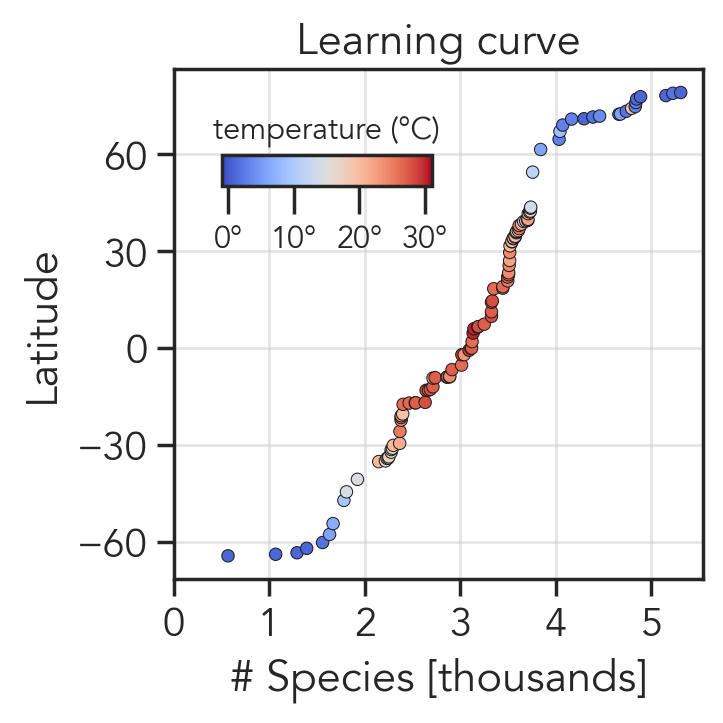

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(3.5,3.5), constrained_layout=True)
richness_order = np.array(richness_order)
latitude_order = [SRF_gdf.loc[SRF_gdf['station']==station, 'latitude'].values[0] for station in Abundances_SRF.columns]
colors_order = [palette[1+int(SRF_gdf.loc[SRF_gdf['station']==station, 'temp_woa'].values[0])] for station in Abundances_SRF.columns]
#sns.scatterplot(x=latitude_order, y=richness_order, color='forestgreen', edgecolor='k', ax=ax)
sns.scatterplot(y=latitude_order, x=richness_order, color=colors_order, edgecolor='k', ax=ax, s=20, lw=1)
ax.set_ylabel('Latitude')
ax.set_title('Learning curve')
ax.set_xlabel('# Species [thousands]')
ax.set_yticks(np.arange(-60, 90, 30))
ax.set_xticks(np.arange(0, 6e3, 1e3))
# format of xticks is scientific
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.set_xticklabels([f'{int(x/1e3)}' for x in ax.get_xticks()])

cax = fig.add_axes([0.3, 0.75, 0.3, 0.045])
cax.tick_params(labelsize=10, size=10)
sm = plt.cm.ScalarMappable(cmap=palettename, norm=plt.Normalize(vmin=-1, vmax=31))
sm._A = []
cbar = fig.colorbar(sm, cax=cax, ticks=[0., 10., 20., 30.], orientation='horizontal')#, fraction=0.026, pad=-0.2)
cbar.ax.set_xticklabels(['0°', '10°', '20°', '30°'],  font='Avenir', fontsize=11)
cbar.ax.set_title('temperature (°C)', font='Avenir', fontsize=11)

ax.grid(True, which='major', axis='both', alpha=0.5, zorder=0)


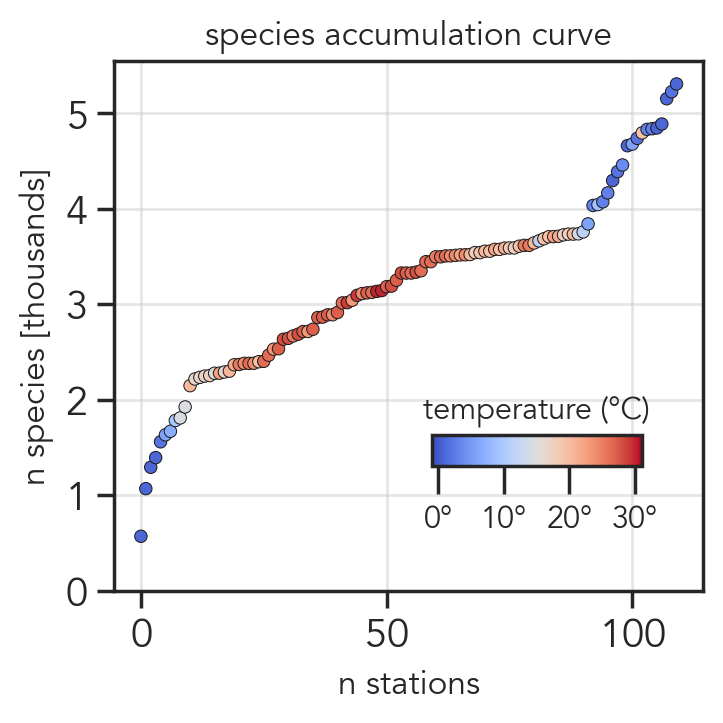

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(3.5,3.5), constrained_layout=True)
richness_order = np.array(richness_order)
latitude_order = [SRF_gdf.loc[SRF_gdf['station']==station, 'latitude'].values[0] for station in Abundances_SRF.columns]
colors_order = [palette[1+int(SRF_gdf.loc[SRF_gdf['station']==station, 'temp_woa'].values[0])] for station in Abundances_SRF.columns]
#sns.scatterplot(x=latitude_order, y=richness_order, color='forestgreen', edgecolor='k', ax=ax)
sns.scatterplot(x=np.arange(len(latitude_order)), y=richness_order, color=colors_order, edgecolor='k', ax=ax, s=20, lw=1)
ax.set_xlabel('n stations', fontsize=12)    
ax.set_title('species accumulation curve', fontsize=12)  
ax.set_ylabel(r'n species [thousands]', fontsize=12)  
ax.set_yticks(np.arange(0, 6e3, 1e3))
# format of xticks is scientific
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.set_yticklabels([f'{int(x/1e3)}' for x in ax.get_yticks()])

cax = fig.add_axes([0.6, 0.35, 0.3, 0.045])
cax.tick_params(labelsize=10, size=10)
sm = plt.cm.ScalarMappable(cmap=palettename, norm=plt.Normalize(vmin=-1, vmax=31))
sm._A = []
cbar = fig.colorbar(sm, cax=cax, ticks=[0., 10., 20., 30.], orientation='horizontal')#, fraction=0.026, pad=-0.2)
cbar.ax.set_xticklabels(['0°', '10°', '20°', '30°'],  font='Avenir', fontsize=11)
cbar.ax.set_title('temperature (°C)', font='Avenir', fontsize=11)

ax.grid(True, which='major', axis='both', alpha=0.5, zorder=0)

figname = 'species_accumulation_curve.png'
fig.savefig(figname, dpi=300, bbox_inches='tight')


In [ ]:
! pwd

/Users/epigani/Library/CloudStorage/GoogleDrive-emanuele.pigani.1@unipd.it/.shortcut-targets-by-id/17Sn-Ra2REh5B86l96gE_Smchh22WCsgo/PhD-Emanuele Pigani/finished_projects/Pigani HayMele et al 2024/downscaling_richness/code


In [ ]:
# dominant species are the top 20 species of each station
 
dominant_species = [Abundances_SRF[Abundances_SRF.columns[:i+1]].sum(axis=1).sort_values(ascending=False).index[:20] for i in range(len(Abundances_SRF.columns))]
dominant_species = np.unique(np.concatenate(dominant_species))
print(dominant_species)

['00b5bb3b1cae64e4d2761e16fc91b2cb' '039a44f7c456a8d518a656d4bddb3594'
 '044e857fc8eb5fd22318010046f420af' '0dee4375a6cbe9d2a091e451b1a96370'
 '14b113961e0805fb5e1bb3b40d828f52' '14d6921f8bc3cf5beeb7e09e97590b44'
 '1a3552c223231f0691e3309b22560e91' '1dd232dc11ab0be77562507e2cd0e920'
 '1e603b319d769d234717b272f9ec8975' '23f9d501a385822185c98c43e4aa6138'
 '2441f754a9a8bea98182423c1e6a7158' '286d0a7b136ce52d173a14a049bc850a'
 '30191c0570b3035d38a5bc7cc8738a04' '306a2eb17ca434af18012e3022e25711'
 '361acffd0e91f5773bfb02e52fcb2c60' '383cc84a981b56d04f96f0be21dd64e4'
 '397910ebcdb4f9a593e2df561dc633a7' '4e1edcb4e329a5b98ca74046f50a3330'
 '50f50e84fa60a9cc983622dab6138115' '5b2d83f3819947079d346cf06dd3b9dd'
 '62e00c51a8e933d08fc96cfec5144a95' '65cc2b94239670a78850e9f6afda260e'
 '683e0a6d1346556f20c56daeeeeff403' '6d2848220b25d52137b36be6a85c69d9'
 '7439fbf150289665aa6caa873eafc8af' '75e1bd21dc35335d7744c97ecf12417b'
 '83866f324e2d4a759347ff72721f3af3' '8414dafcda9e42b8a673e888e2fbf496'
 '8717

In [ ]:
dominant_species

array(['00b5bb3b1cae64e4d2761e16fc91b2cb',
       '039a44f7c456a8d518a656d4bddb3594',
       '044e857fc8eb5fd22318010046f420af',
       '0dee4375a6cbe9d2a091e451b1a96370',
       '14b113961e0805fb5e1bb3b40d828f52',
       '14d6921f8bc3cf5beeb7e09e97590b44',
       '1a3552c223231f0691e3309b22560e91',
       '1dd232dc11ab0be77562507e2cd0e920',
       '1e603b319d769d234717b272f9ec8975',
       '23f9d501a385822185c98c43e4aa6138',
       '2441f754a9a8bea98182423c1e6a7158',
       '286d0a7b136ce52d173a14a049bc850a',
       '30191c0570b3035d38a5bc7cc8738a04',
       '306a2eb17ca434af18012e3022e25711',
       '361acffd0e91f5773bfb02e52fcb2c60',
       '383cc84a981b56d04f96f0be21dd64e4',
       '397910ebcdb4f9a593e2df561dc633a7',
       '4e1edcb4e329a5b98ca74046f50a3330',
       '50f50e84fa60a9cc983622dab6138115',
       '5b2d83f3819947079d346cf06dd3b9dd',
       '62e00c51a8e933d08fc96cfec5144a95',
       '65cc2b94239670a78850e9f6afda260e',
       '683e0a6d1346556f20c56daeeeeff403',
       '6d2

In [ ]:
topID_metaB_key['total_abundance'] = {species: Abundances_SRF.loc[species].sum() for species in dominant_species}
topID_metaB_key.sort_values(by='total_abundance', ascending=False, inplace=True)

In [ ]:
topID_metaB_key

,taxon,level,total_abundance
md5sum,,,
30191c0570b3035d38a5bc7cc8738a04,Actinocyclus curvulatus,species,2676395
cf7d6062d57f5919cac2af3d59d30b27,Bacillariophyceae,class,805813
928371a2f97bb272473c6fd6d0af2b12,Chaetoceros rostratus,species,761336
d9fba6377f54ac59eb080a698fb80b5a,Proboscia,genus,678288
039a44f7c456a8d518a656d4bddb3594,Odontella sinensis,species,665524
ce119ed148d7106582ddebac1983a3ec,Leptocylindrus,genus,643231
91a0bf62bf8dc9a63294b12e76618a1f,Rhizosolenianae,superorder,414666
50f50e84fa60a9cc983622dab6138115,NaN,NaN,356013
683e0a6d1346556f20c56daeeeeff403,Thalassiosira tumida,species,328065


In [ ]:
richness_order_dominant = []
biomass_dominant = []

for i, col in enumerate(Abundances_SRF.columns):
    subset = Abundances_SRF.loc[dominant_species][Abundances_SRF.columns[:i+1]]
    # sum the columns
    sums = subset.sum(axis=1)
    # count the positive values
    richness = len(sums[sums>0])
    richness_order_dominant.append(richness)
    biomass_dominant.append(Abundances_SRF.loc[dominant_species][Abundances_SRF.columns[:i+1]].sum().sum())
    
print(len(richness_order_dominant))

123


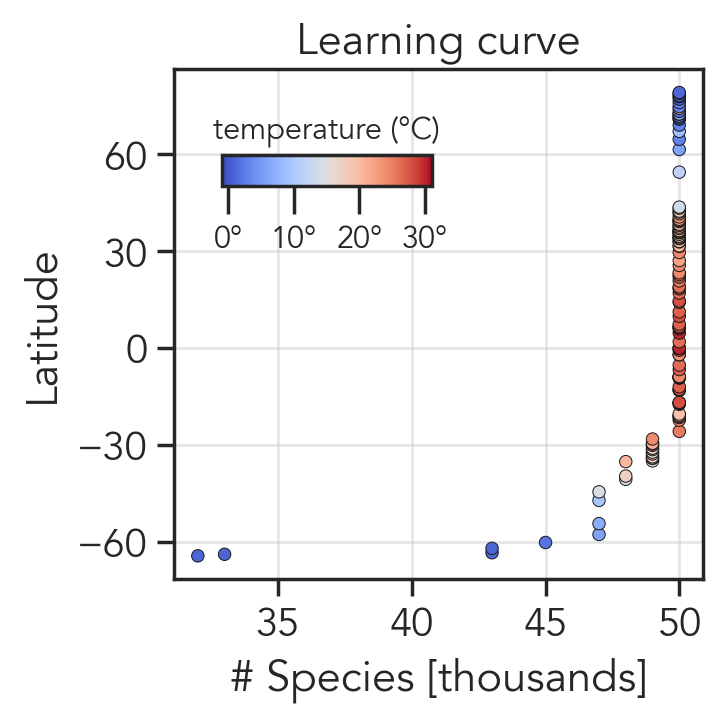

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(3.5,3.5), constrained_layout=True)
richness_order_dominant = np.array(richness_order_dominant)
latitude_order = [SRF_gdf.loc[SRF_gdf['station']==station, 'latitude'].values[0] for station in Abundances_SRF.columns]
colors_order = [palette[1+int(SRF_gdf.loc[SRF_gdf['station']==station, 'temp_woa'].values[0])] for station in Abundances_SRF.columns]
#sns.scatterplot(x=latitude_order, y=richness_order, color='forestgreen', edgecolor='k', ax=ax)
sns.scatterplot(y=latitude_order, x=richness_order_dominant, color=colors_order, edgecolor='k', ax=ax, s=20, lw=1)
ax.set_ylabel('Latitude')
ax.set_title('Learning curve')
ax.set_xlabel('# Species [thousands]')
ax.set_yticks(np.arange(-60, 90, 30))
#ax.set_xticks(np.arange(0, 6e3, 1e3))
# format of xticks is scientific
#ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#ax.set_xticklabels([f'{int(x/1e3)}' for x in ax.get_xticks()])

cax = fig.add_axes([0.3, 0.75, 0.3, 0.045])
cax.tick_params(labelsize=10, size=10)
sm = plt.cm.ScalarMappable(cmap=palettename, norm=plt.Normalize(vmin=-1, vmax=31))
sm._A = []
cbar = fig.colorbar(sm, cax=cax, ticks=[0., 10., 20., 30.], orientation='horizontal')#, fraction=0.026, pad=-0.2)
cbar.ax.set_xticklabels(['0°', '10°', '20°', '30°'],  font='Avenir', fontsize=11)
cbar.ax.set_title('temperature (°C)', font='Avenir', fontsize=11)

ax.grid(True, which='major', axis='both', alpha=0.5, zorder=0)


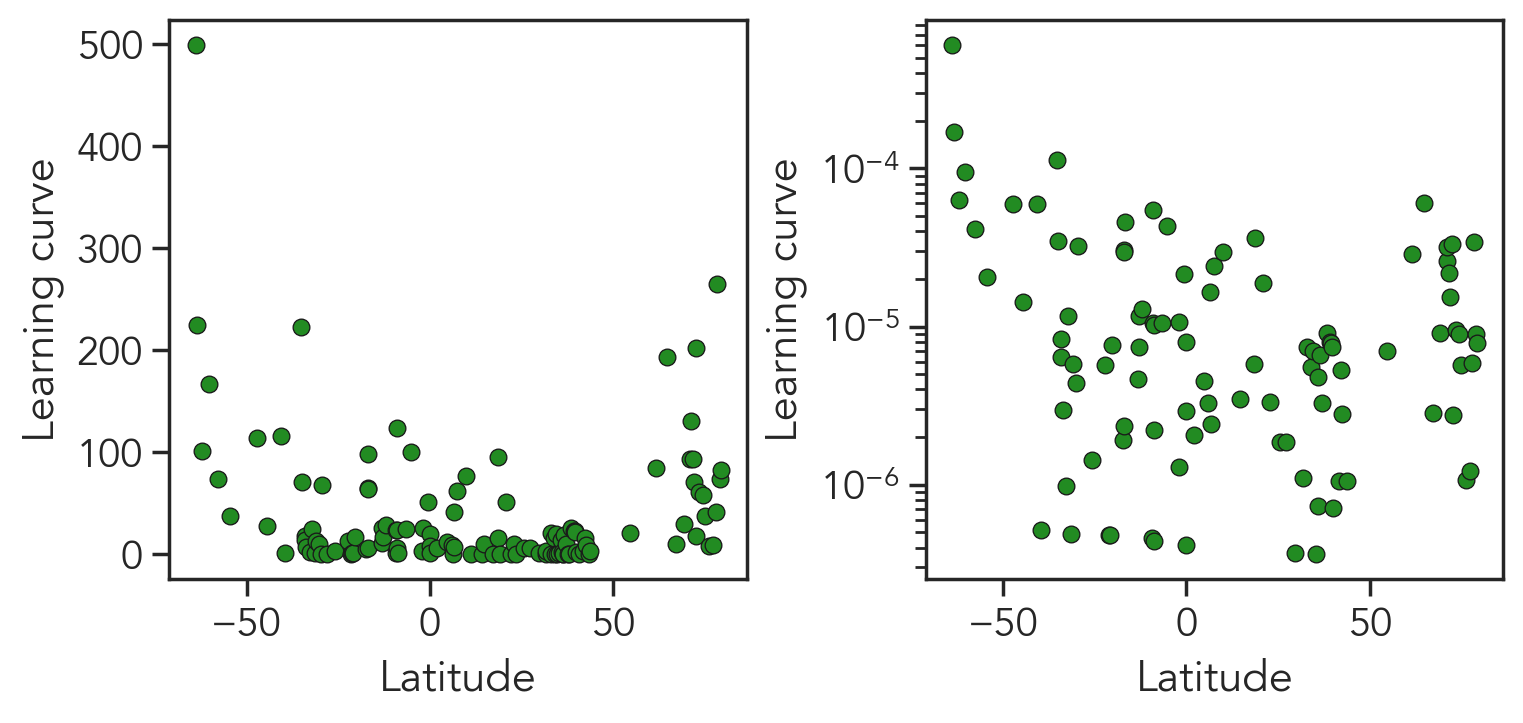

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(7.5,3.5), constrained_layout=True)
ax = axes[0]
x = latitude_order[1:]
sns.scatterplot(x=x, y=(richness_order[1:]-richness_order[:-1]), color='forestgreen', edgecolor='k', ax=ax)
ax.set_xlabel('Latitude')
ax.set_ylabel('Learning curve')
#ax.set_yscale('log')

ax = axes[1]
sns.scatterplot(x=x, y=(richness_order[1:]-richness_order[:-1])/biomass[1:], color='forestgreen', edgecolor='k', ax=ax)
ax.set_xlabel('Latitude')
ax.set_ylabel('Learning curve')
ax.set_yscale('log')

0007584343baed6a66bc624ab07afa51    0.008130
000d7f48a59463756281b4ea64af743f    0.000000
001dedda63f65dd120ccef5ed9eff10a    0.024390
002590d1d8d94af8dfcf5980c719d116    0.008130
00374edaf2b110b52ffe3daea3626d01    0.016260
                                      ...   
ffbb560ce62f5a7dd92040a2be6fbcb4    0.016260
ffbec099d69da313c5253f88e48d23c9    0.016260
ffe268d3373da1dd4a156f814ccc09e8    0.024390
ffe8a780861ace578bc742dae5b7efa3    0.008130
fff7152fe79cb1a902216dfa9281d6e1    0.065041
Length: 5830, dtype: float64


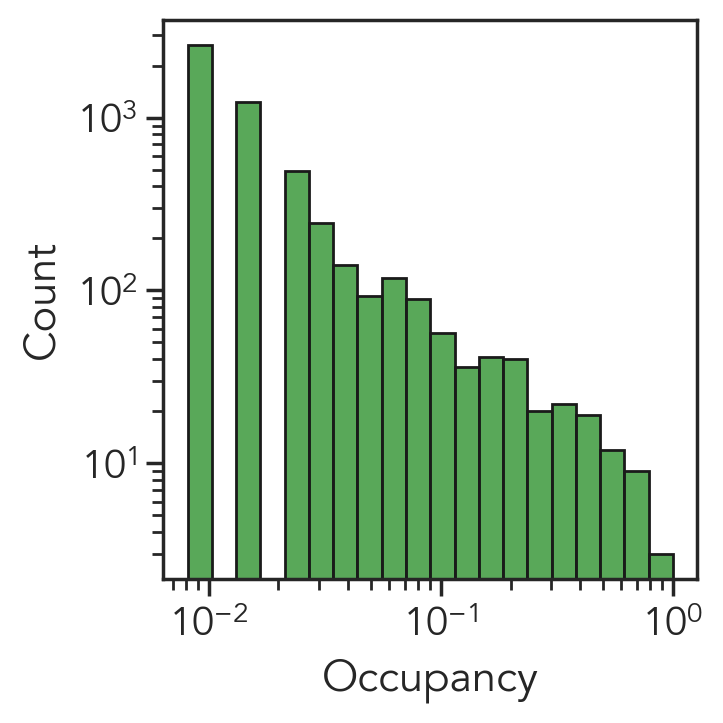

In [ ]:
relative_occupancies = Abundances_SRF.astype(bool).sum(axis=1)/len(Abundances_SRF.columns)
print(relative_occupancies)

fig, ax = plt.subplots(1,1, figsize=(3.5,3.5), constrained_layout=True)
bins = np.logspace(np.log10(1/len(Abundances_SRF.columns)), 0, 21)
sns.histplot(relative_occupancies, bins=bins, ax=ax, color='forestgreen', edgecolor='k', linewidth=1)
ax.set_xlabel('Occupancy')
ax.set_ylabel('Count')
ax.set_yscale('log')
ax.set_xscale('log')


In [ ]:
print(len(Abundances_SRF.columns))

123


0007584343baed6a66bc624ab07afa51    1
000d7f48a59463756281b4ea64af743f    0
001dedda63f65dd120ccef5ed9eff10a    3
002590d1d8d94af8dfcf5980c719d116    1
00374edaf2b110b52ffe3daea3626d01    2
                                   ..
ffbb560ce62f5a7dd92040a2be6fbcb4    2
ffbec099d69da313c5253f88e48d23c9    2
ffe268d3373da1dd4a156f814ccc09e8    3
ffe8a780861ace578bc742dae5b7efa3    1
fff7152fe79cb1a902216dfa9281d6e1    8
Length: 5830, dtype: int64


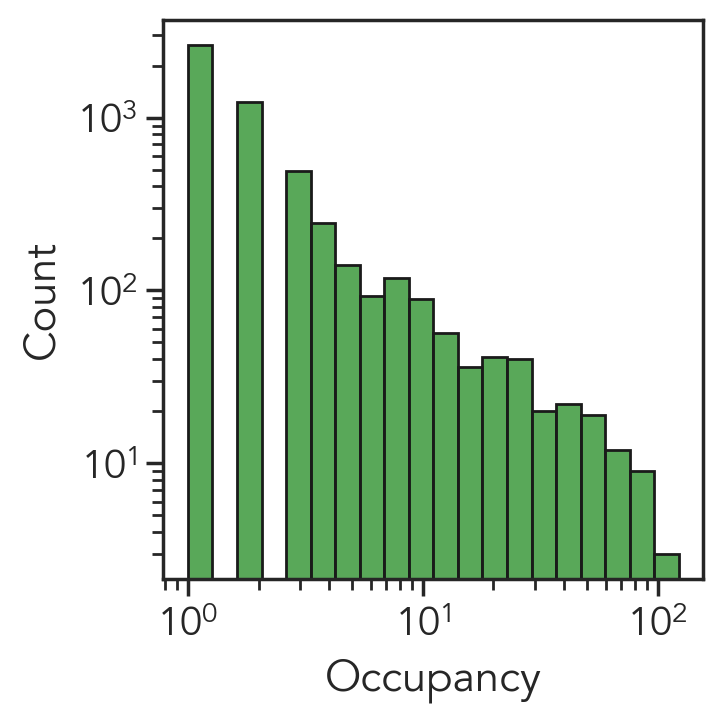

In [ ]:
occupancies = Abundances_SRF.astype(bool).sum(axis=1)#/len(Abundances_SRF.columns)
print(occupancies)

fig, ax = plt.subplots(1,1, figsize=(3.5,3.5), constrained_layout=True)
bins = np.logspace(np.log10(1), np.log10(len(Abundances_SRF.columns)), 21)
sns.histplot(occupancies, bins=bins, ax=ax, color='forestgreen', edgecolor='k', linewidth=1)
ax.set_xlabel('Occupancy')
ax.set_ylabel('Count')
ax.set_yscale('log')
ax.set_xscale('log')

In [ ]:
Abundances_SRF.shape

(5830, 123)

In [ ]:
#relative_Abundances_SRF = Abundances_SRF/Abundances_SRF.sum(axis=0)
mean, std = Abundances_SRF.mean(axis=1), Abundances_SRF.std(axis=1)
Ns = Abundances_SRF.sum(axis=0)
alpha, beta = mean**2/std, std/mean
print(alpha, beta)
expected_occupancies = []
for i in range(Abundances_SRF.shape[0]):
    sum_i = 0
    for j in range(Abundances_SRF.shape[1]):
        sum_i += (1+Ns.iloc[j]*mean.iloc[i]/beta.iloc[i])**(-beta.iloc[i])
    sum_i /= Abundances_SRF.shape[1]
    expected_occupancies.append(1-sum_i)

0007584343baed6a66bc624ab07afa51    0.002932
000d7f48a59463756281b4ea64af743f         NaN
001dedda63f65dd120ccef5ed9eff10a    0.008606
002590d1d8d94af8dfcf5980c719d116    0.000733
00374edaf2b110b52ffe3daea3626d01    0.002082
                                      ...   
ffbb560ce62f5a7dd92040a2be6fbcb4    0.004453
ffbec099d69da313c5253f88e48d23c9    0.002960
ffe268d3373da1dd4a156f814ccc09e8    0.014574
ffe8a780861ace578bc742dae5b7efa3    0.000733
fff7152fe79cb1a902216dfa9281d6e1    0.259110
Length: 5830, dtype: float64 0007584343baed6a66bc624ab07afa51    11.090537
000d7f48a59463756281b4ea64af743f          NaN
001dedda63f65dd120ccef5ed9eff10a     7.557820
002590d1d8d94af8dfcf5980c719d116    11.090537
00374edaf2b110b52ffe3daea3626d01     7.809987
                                      ...    
ffbb560ce62f5a7dd92040a2be6fbcb4     9.127835
ffbec099d69da313c5253f88e48d23c9     8.239250
ffe268d3373da1dd4a156f814ccc09e8     7.809987
ffe8a780861ace578bc742dae5b7efa3    11.090537
fff7152fe79cb1a9

<Axes: >

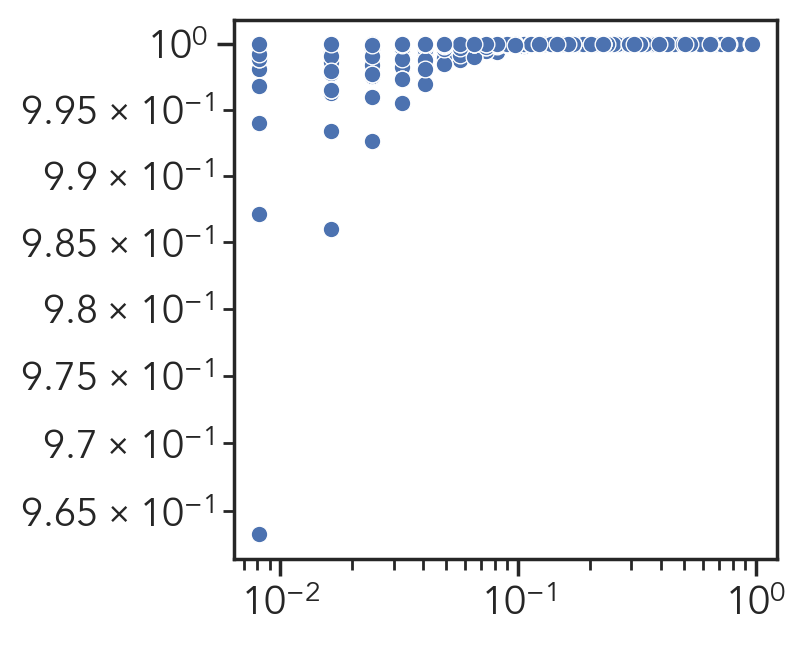

In [ ]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

sns.scatterplot(x=relative_occupancies, y = expected_occupancies)

<Axes: >

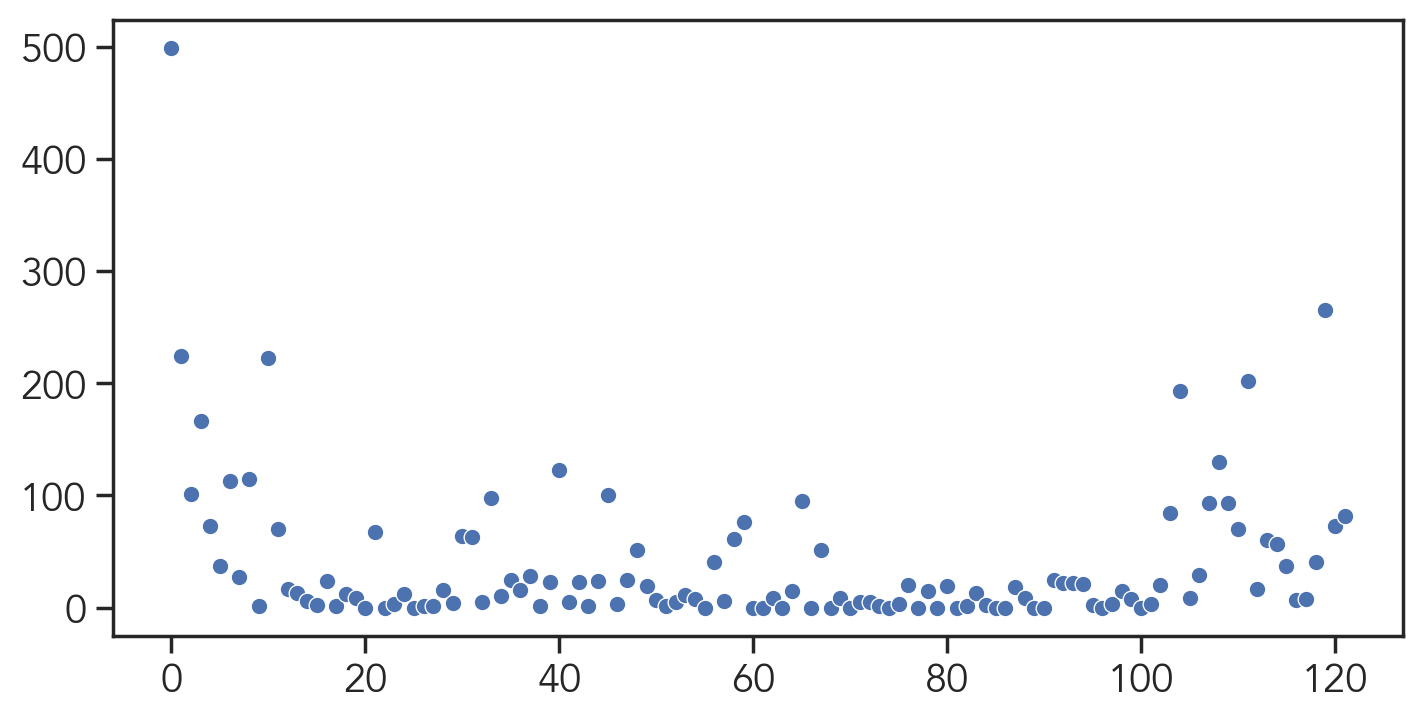

In [ ]:
stations =Abundances_SRF.columns
#temperatures = [SRF_gdf.loc[station, 'temp_woa'] for station in stations]
richness_order = np.array(richness_order)
fig, ax = plt.subplots(1,1, figsize=(7,3.5), constrained_layout=True)
learning_curve =richness_order[1:]-richness_order[:-1]
sns.scatterplot(learning_curve, ax=ax)


In [ ]:
learning_curve

array([499, 224, 101, 166,  73,  37, 113,  27, 115,   1, 222,  70,  17,
        13,   6,   2,  24,   1,  12,   9,   0,  67,   0,   3,  12,   0,
         1,   1,  16,   4,  64,  63,   5,  98,  10,  25,  16,  28,   1,
        23, 123,   5,  23,   1,  24, 100,   3,  25,  51,  19,   7,   1,
         5,  11,   8,   0,  41,   6,  61,  76,   0,   0,   9,   0,  15,
        95,   0,  51,   0,   9,   0,   5,   5,   1,   0,   3,  20,   0,
        15,   0,  19,   0,   1,  13,   2,   0,   0,  18,   9,   0,   0,
        25,  22,  22,  21,   2,   0,   3,  15,   8,   0,   3,  20,  84,
       193,   9,  29,  93, 130,  93,  70, 202,  17,  60,  57,  37,   7,
         8,  41, 265,  73,  82])

In [ ]:
richness = sums[sums>0].count()
richness

50

In [ ]:
len(sums[sums>0])

50

In [ ]:
a = 2

In [ ]:
np.log10(a)

0.3010299956639812

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(3.5,3.5), constrained_layout=True)7

# A is a random matrix with diagonal -1, N=1000 elements, C=0.1, sigma=0.1
A = np.random.rand(1000,1000)
A = A - np.diag(np.diag(A))
N = 1000
C = 0.1
sigma = 0.1

SyntaxError: invalid syntax (2524338961.py, line 1)